As a consultant for Olist (online solution for marketplaces),
we are commissioned to segment their client database. <br>
The goal is to establish a base for their communication campaigns. <br> 
They also require a maintenance contract based on a stability analysis of the different segments over time.

pd.show_versions() <br>
pandas version : 1.0.5 <br>
numpy version : 1.18.5 <br>
seaborn version : 0.11.2 <br>
matplotlib version : 3.2.2 <br>

This is the tryout notebook where I put to the test different clustering algorithms <br>
- : Usual loadings <br>
Part - 1 <a href='#simple'> Simple models <br>
$\;\;\;\;\;\;$ <a href='#pareto'> Pareto law <br>
$\;\;\;\;\;\;$ <a href='#abc'> ABC method <br>
$\;\;\;\;\;\;$ <a href='#hand'> RFM method <br>
$\;\;\;\;\;\;$ <a href='#Krfm'> Kmeans RFM <br>
    
Part 2 - KMeans with more parameters <br>
$\;\;\;\;\;\;$ <a href='#5means'> KMeans with 5 <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#elbo'> Elbow method </a> <br> 
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#davi'> David Bouldin method </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#silho'> Silhouette method </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#inter'> Intercluster Distance Maps </a> <br>
$\;\;\;\;\;\;$ <a href='#catmeans'> KMeans 5 with categories <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#nclus'> Best number of clusters </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pcav'> PCA vizualisation </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#cread'> Reading the cluster </a> <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#extra'> Extra readings </a> <br>
$\;\;\;\;\;\;$ <a href='#full'> Full feature engineering with PCA <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pcafull'> Full features PCA <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pcafullnumb'> Best number of clusters <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pca15'> Kmeans_PCA 15 <br>
$\;\;\;\;\;\;\;\;\;\;\;\;$ <a href='#pca5'> Kmeans_PCA 7 <br>
    
Part - 3 Other Algorithmes <br>
$\;\;\;\;\;\;$ <a href='#agglo'> Agglomerative Hierarchical Clustering <br>
$\;\;\;\;\;\;$ <a href='#dbsc'> DBSCAN <br>

# Part 3 - Other Algorithmes

<a id='agglo' />

## Agglomerative Hierarchical Clustering

"The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters."
_docs.scipy.org_

In [27]:
X_fNorm.shape

(90927, 17)

#### With more than 3 hours I couldn't plot the full df dendogram so I need to stick with a sample from it

total time:  11.401500701904297 sec


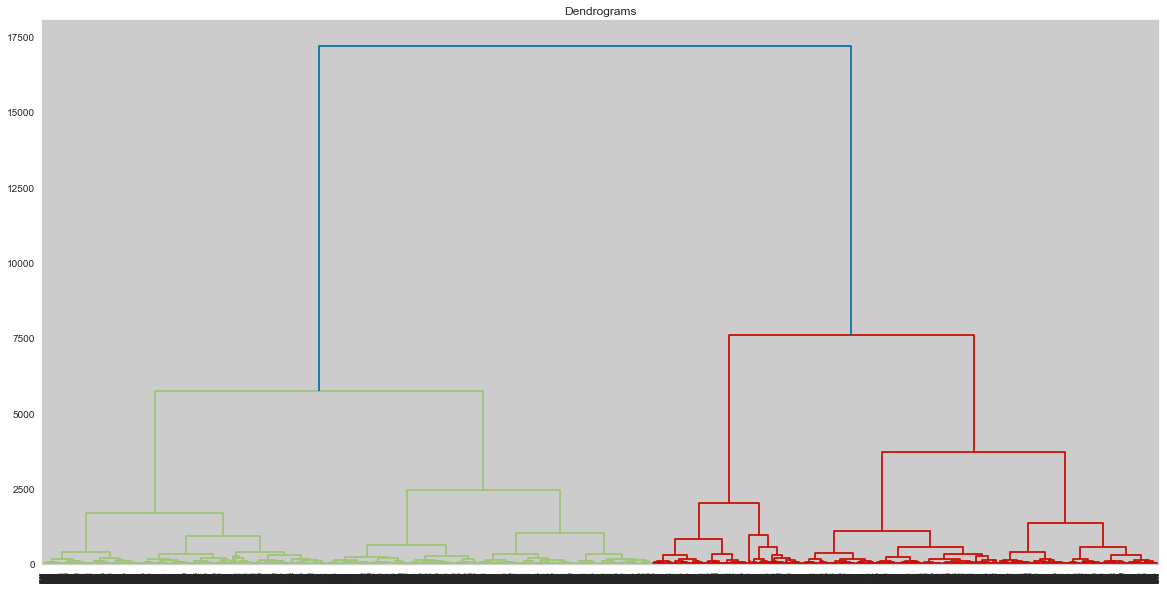

In [28]:
startt = time.time()

plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_reduc_full, method='ward'))

endt = time.time()
print("total time: ",(endt - startt),"sec")

In [29]:
# Linkage performs hierarchical/agglomerative clustering with specified method
Z = linkage(X_reduc_full, method='ward')

In [30]:
# Cophenetic Correlation Coefficient
# Calculate the cophenetic distances between each observation in the hierarchical clustering defined by the linkage Z
# The closer value to 1, the better the clustering preserves the original distances

c, coph_dists = cophenet(Z, pdist(X_reduc_full))
c

0.6934805604873473

## Ward method
Minimize the inter clusters variance when creating a new one

#### Dendrogram

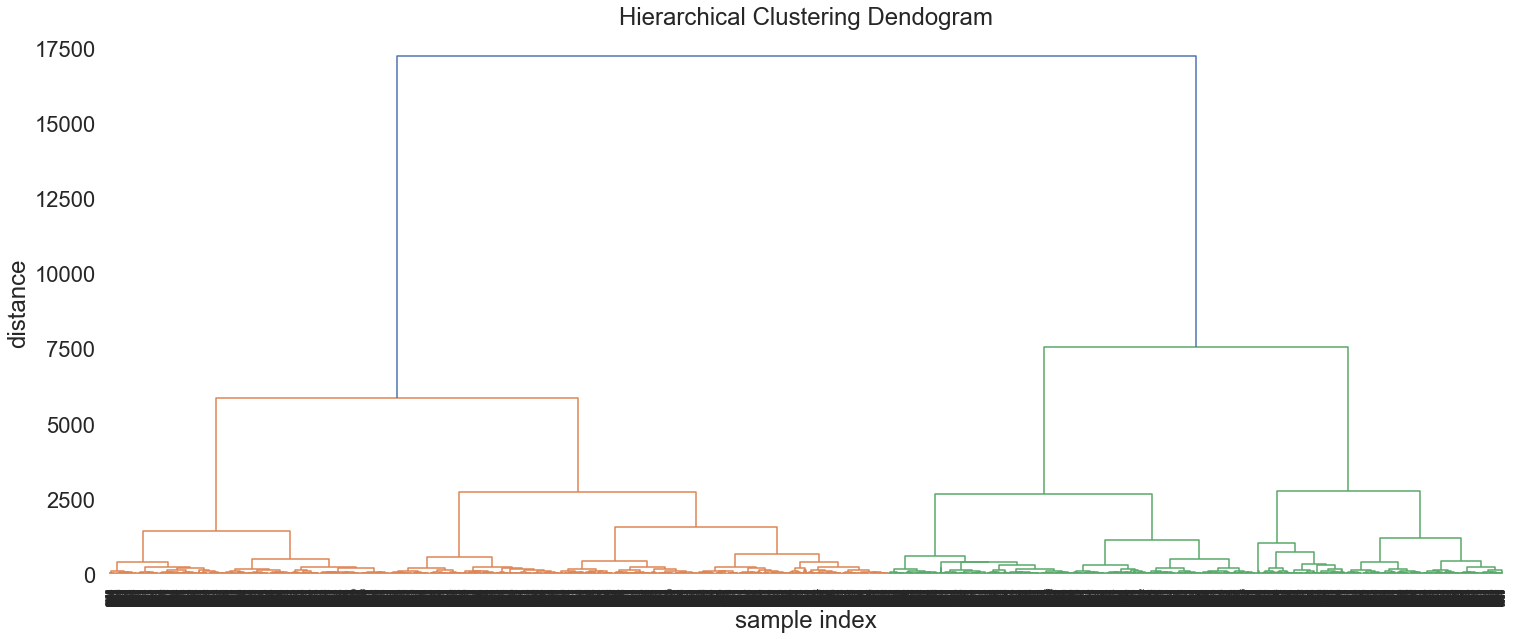

total time:  112.20470809936523 sec


In [170]:
startt = time.time()

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation = 90., # rotates the x axis labels of x degrees
    leaf_font_size = 8., # font size for the x axis labels
)

plt.show()

endt = time.time()
print("total time: ",(endt - startt),"sec")

#### Dendrogram Truncation

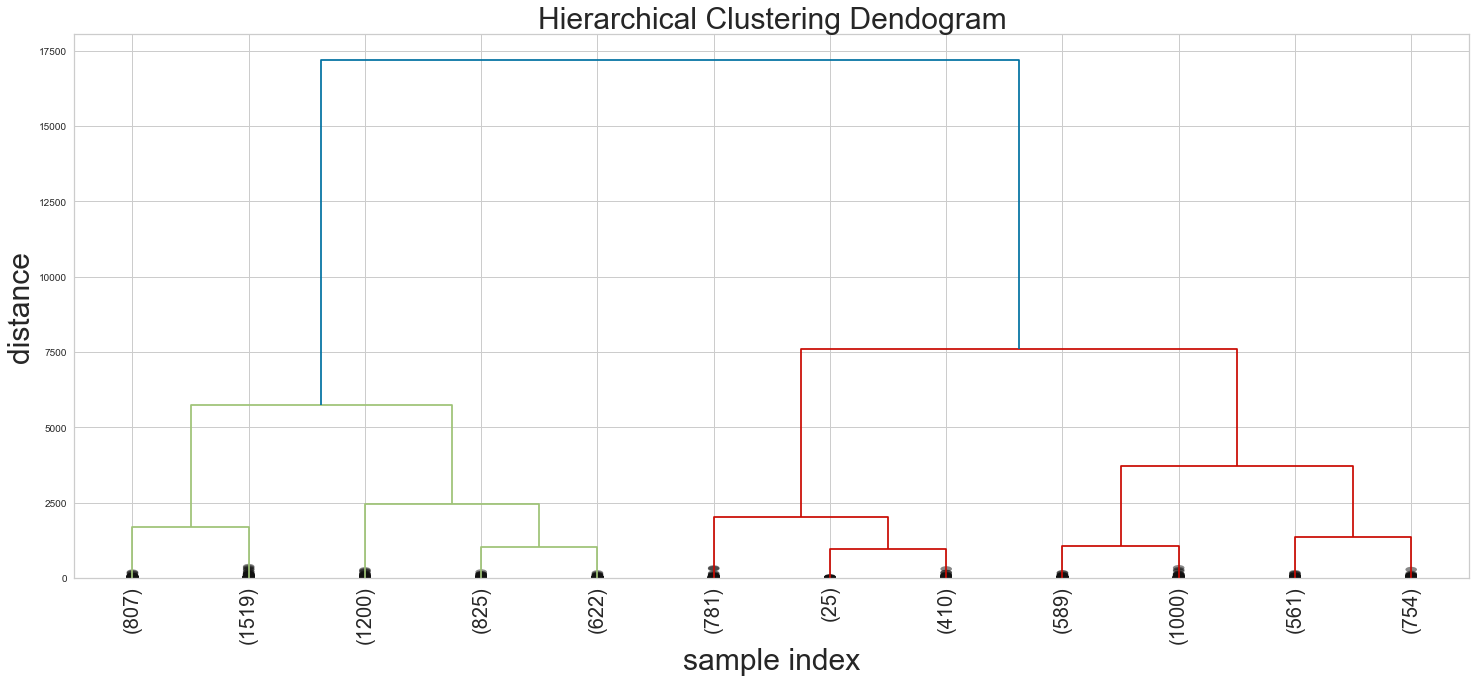

total time:  20.641622066497803 sec


In [31]:
startt = time.time()

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram', fontsize = 30)
plt.xlabel('sample index', fontsize = 30)
plt.ylabel('distance', fontsize = 30)
dendrogram(
    Z,
    truncate_mode = 'lastp', # shows only the last p merged clusters
    p = 12, # show the last x merged clusters
    #show_leaf_counts = False, # otherwise numbers in brackets are counts
    leaf_rotation = 90., # rotates the x axis labels of x degrees
    leaf_font_size = 20, # font size for the x axis labels
    show_contracted = True, # to get a distribution impression in trunckated braches
)

plt.show()

endt = time.time()
print("total time: ",(endt - startt),"sec")

In [33]:
k = 9
fcluster(Z, k, criterion='maxclust')

array([1, 5, 7, ..., 6, 9, 4], dtype=int32)

In [50]:
c, coph_dists = cophenet(Z, pdist(X_reduc_full))
c

0.6937565831999915

In [34]:
X_reduc_full['cluster_hc'] = fcluster(Z, k, criterion='maxclust')

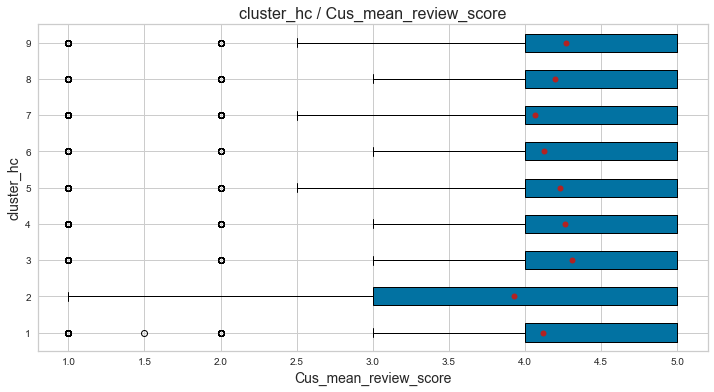

                   sum_sq      df          F        PR(>F)
C(catquali)    154.120195     8.0  11.937652  4.402622e-17
Residual     14659.790729  9084.0        NaN           NaN


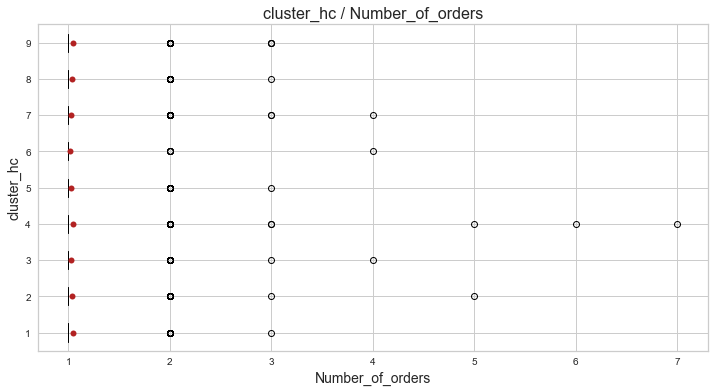

                 sum_sq      df         F    PR(>F)
C(catquali)    0.768138     8.0  2.117724  0.030829
Residual     411.866856  9084.0       NaN       NaN


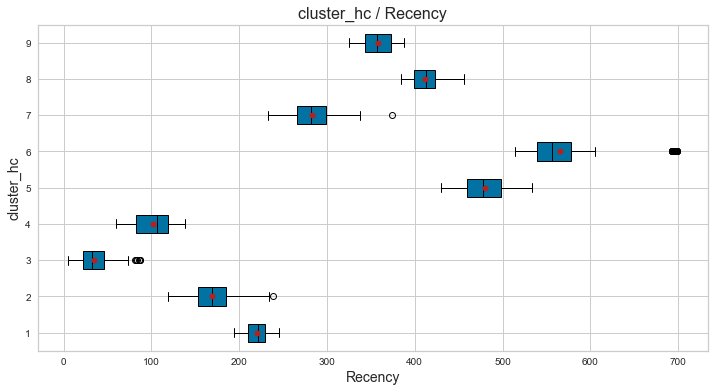

                   sum_sq      df             F  PR(>F)
C(catquali)  2.071194e+08     8.0  59523.670359     0.0
Residual     3.951103e+06  9084.0           NaN     NaN


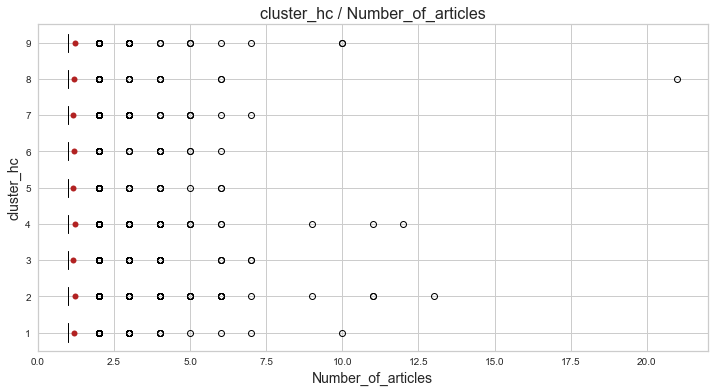

                  sum_sq      df         F    PR(>F)
C(catquali)     6.001843     8.0  1.685977  0.096299
Residual     4042.221186  9084.0       NaN       NaN


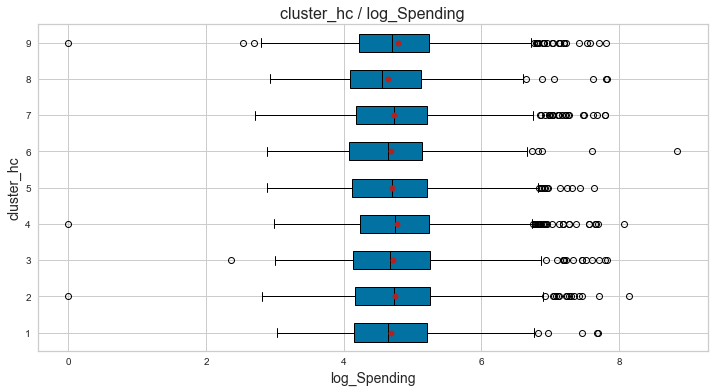

                  sum_sq      df         F    PR(>F)
C(catquali)    10.774734     8.0  2.065631  0.035569
Residual     5922.989165  9084.0       NaN       NaN


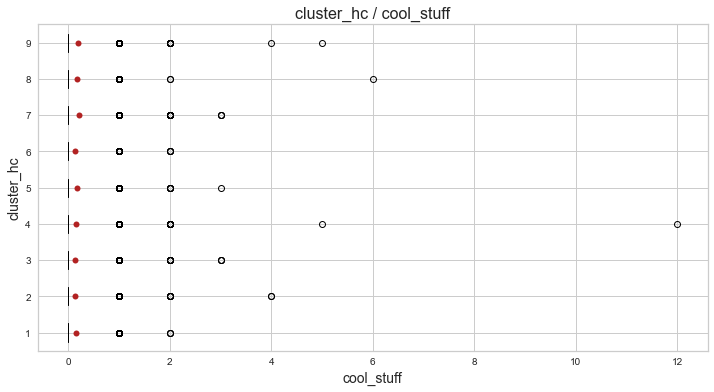

                  sum_sq      df         F        PR(>F)
C(catquali)     8.864412     8.0  6.240864  4.451718e-08
Residual     1612.844155  9084.0       NaN           NaN


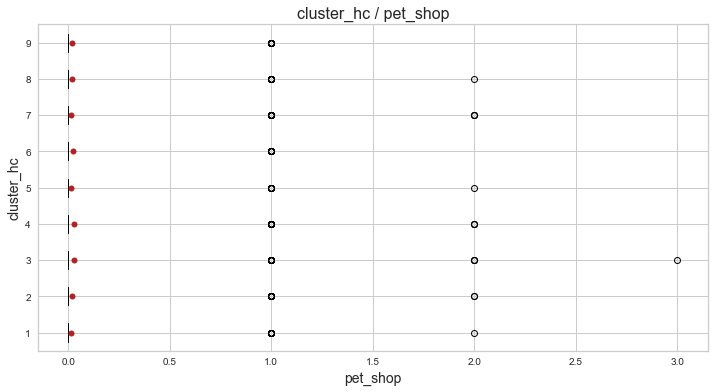

                 sum_sq      df         F    PR(>F)
C(catquali)    0.273451     8.0  1.533556  0.139799
Residual     202.473057  9084.0       NaN       NaN


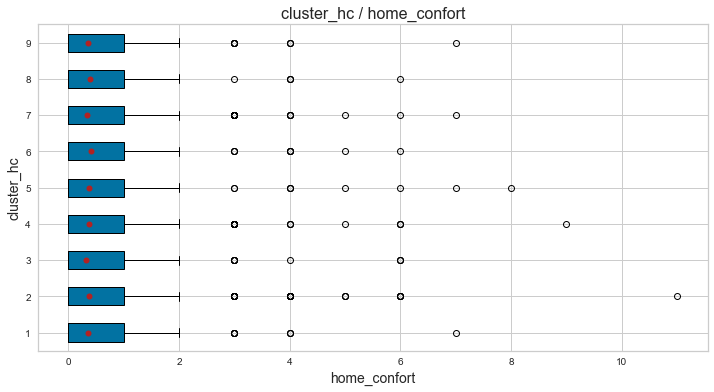

                  sum_sq      df         F    PR(>F)
C(catquali)     5.740409     8.0  1.465879  0.163981
Residual     4446.637904  9084.0       NaN       NaN


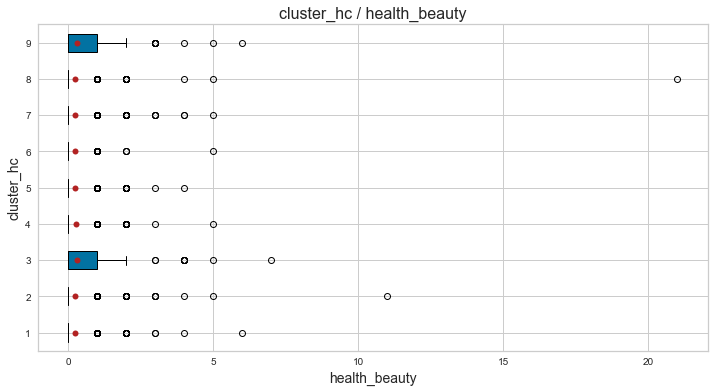

                  sum_sq      df         F   PR(>F)
C(catquali)     6.686263     8.0  2.456185  0.01181
Residual     3091.074213  9084.0       NaN      NaN


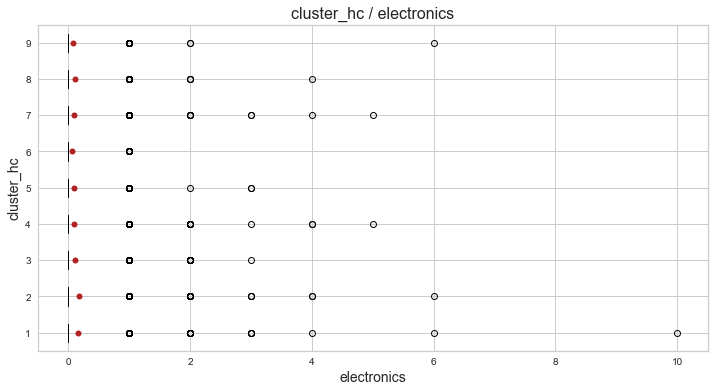

                  sum_sq      df         F        PR(>F)
C(catquali)    10.181008     8.0  8.242479  3.471276e-11
Residual     1402.555602  9084.0       NaN           NaN


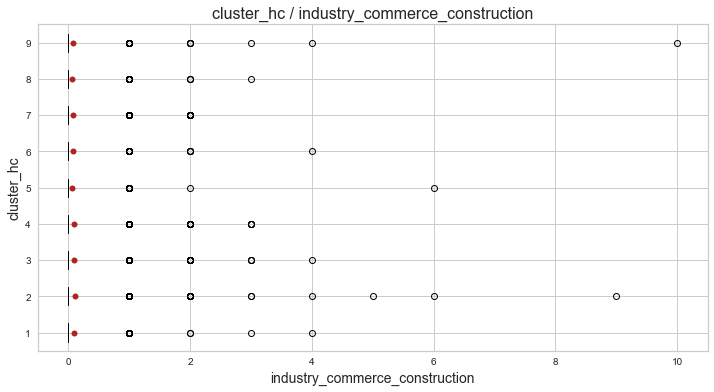

                  sum_sq      df         F   PR(>F)
C(catquali)     2.263868     8.0  2.149566  0.02823
Residual     1195.879979  9084.0       NaN      NaN


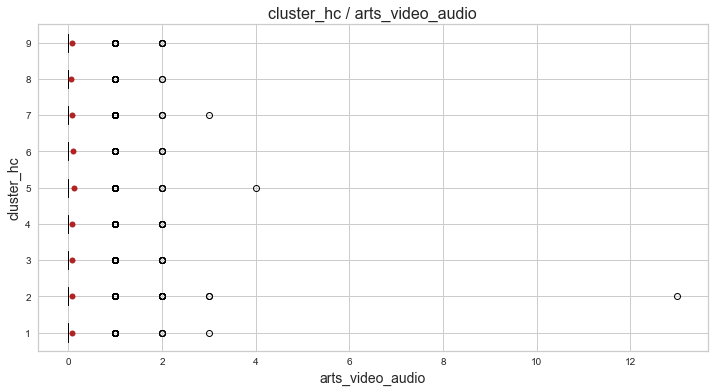

                 sum_sq      df        F   PR(>F)
C(catquali)    1.915236     8.0  2.22468  0.02289
Residual     977.556445  9084.0      NaN      NaN


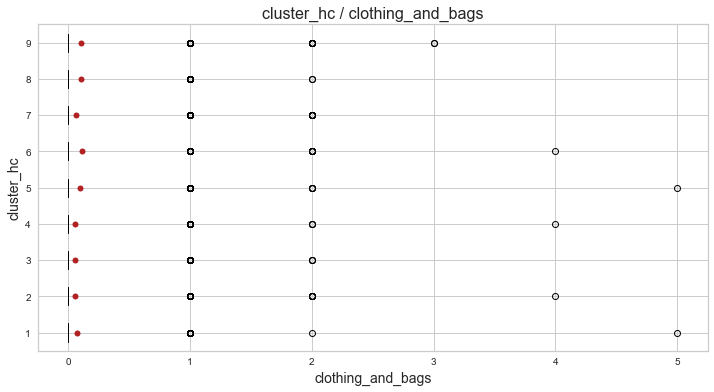

                 sum_sq      df       F    PR(>F)
C(catquali)    3.469563     8.0  5.1717  0.000002
Residual     761.778210  9084.0     NaN       NaN


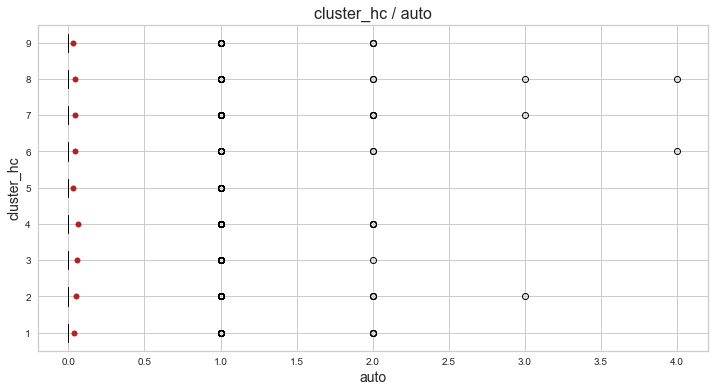

                 sum_sq      df         F    PR(>F)
C(catquali)    1.021518     8.0  2.378966  0.014763
Residual     487.578944  9084.0       NaN       NaN


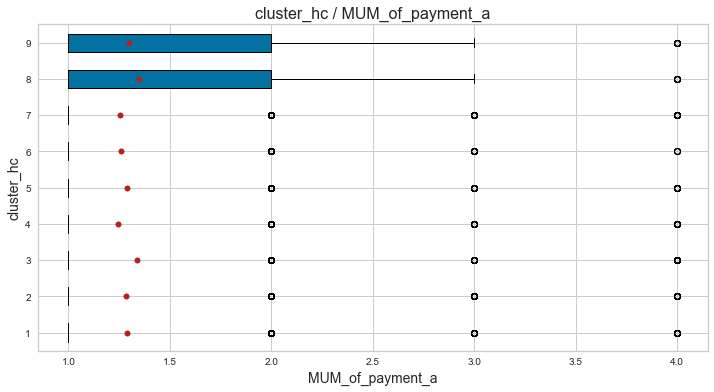

                  sum_sq      df        F    PR(>F)
C(catquali)    10.119332     8.0  3.73087  0.000229
Residual     3079.845037  9084.0      NaN       NaN


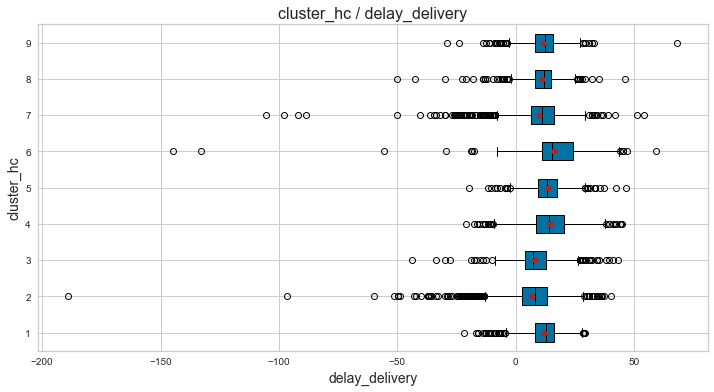

                    sum_sq      df          F         PR(>F)
C(catquali)   74145.619586     8.0  95.376997  5.892334e-153
Residual     882732.249084  9084.0        NaN            NaN


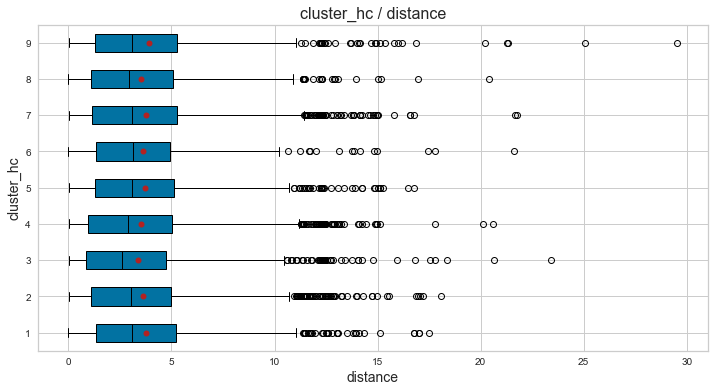

                   sum_sq      df         F    PR(>F)
C(catquali)    205.724677     8.0  2.473871  0.011218
Residual     94427.075714  9084.0       NaN       NaN


In [35]:
plotcat = list(X_reduc_full)

for i in range(17) :
    boxplots(X_reduc_full, 'cluster_hc', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

In [42]:
polarplt(X_reduc_full, 'cluster_hc', selected_full)

In [71]:
X_reduc_full['cluster_hc'].value_counts()

7    1589
2    1519
4    1447
3    1200
1     807
5     781
9     754
8     561
6     435
Name: cluster_hc, dtype: int64

In [175]:
X_reduc_full['Number_of_orders'].value_counts()

1    8819
2     255
3      12
4       3
5       2
7       1
6       1
Name: Number_of_orders, dtype: int64

#### With k = 7

0.6992518606929882
--------
number of individuals in each cluster
3    2143
1    1831
4    1205
5    1196
2    1114
7    1032
6     572
Name: cluster_hc_ward7, dtype: int64


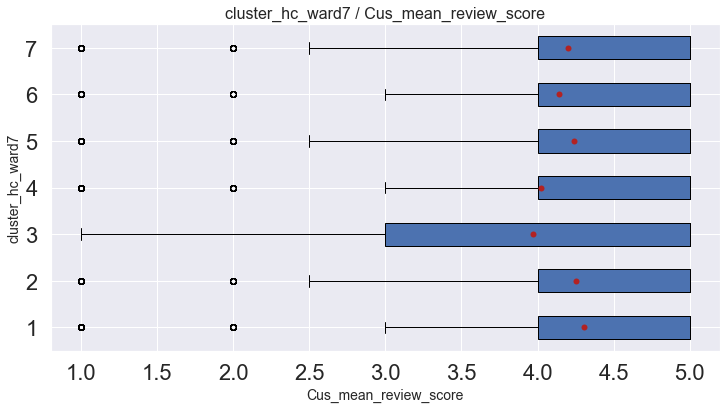

                   sum_sq      df          F        PR(>F)
C(catquali)    158.911032     6.0  16.420626  6.509298e-19
Residual     14654.999892  9086.0        NaN           NaN


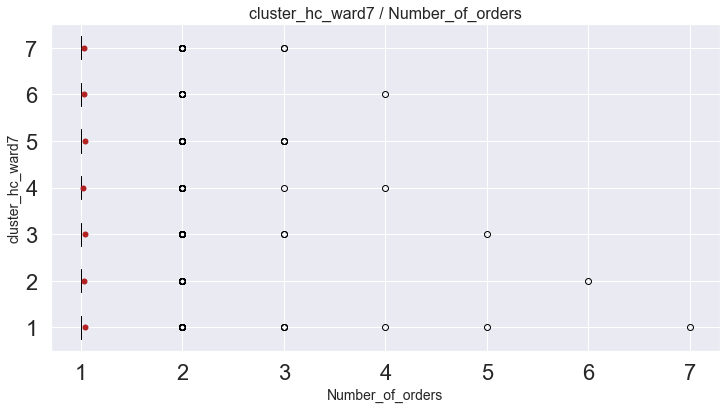

                 sum_sq      df         F    PR(>F)
C(catquali)    0.279279     6.0  1.025622  0.406271
Residual     412.355715  9086.0       NaN       NaN


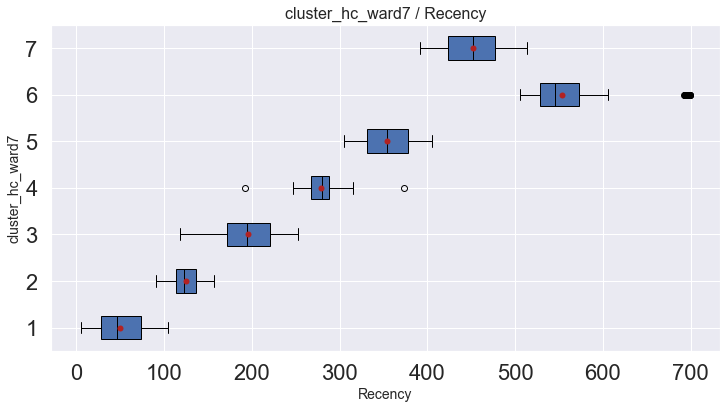

                   sum_sq      df             F  PR(>F)
C(catquali)  2.049968e+08     6.0  51110.422636     0.0
Residual     6.073779e+06  9086.0           NaN     NaN


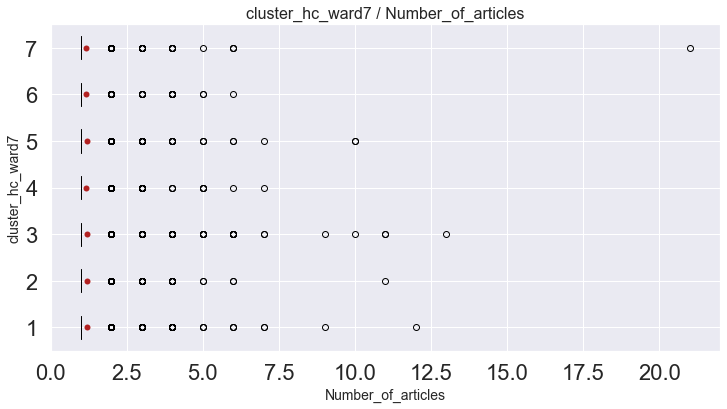

                  sum_sq      df         F    PR(>F)
C(catquali)     2.578311     6.0  0.965093  0.447123
Residual     4045.644718  9086.0       NaN       NaN


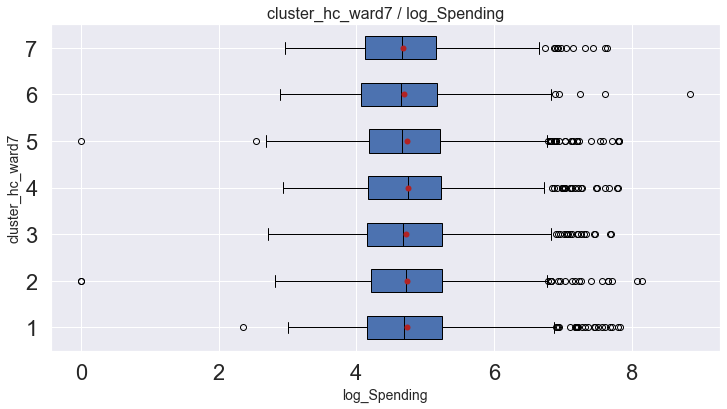

                  sum_sq      df         F    PR(>F)
C(catquali)     4.347952     6.0  1.110438  0.353273
Residual     5929.415947  9086.0       NaN       NaN


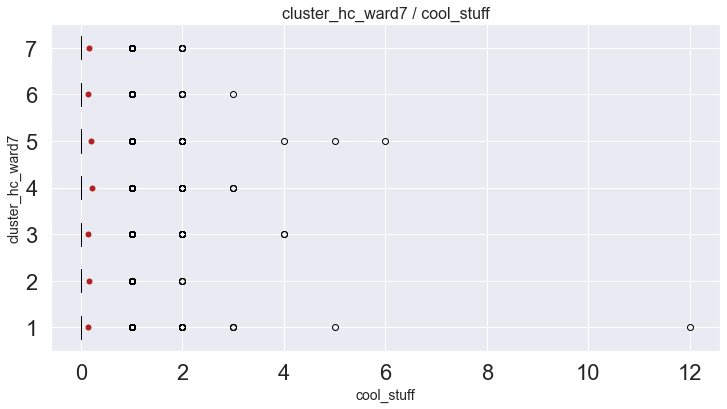

                  sum_sq      df         F        PR(>F)
C(catquali)     9.262978     6.0  8.699355  1.815210e-09
Residual     1612.445589  9086.0       NaN           NaN


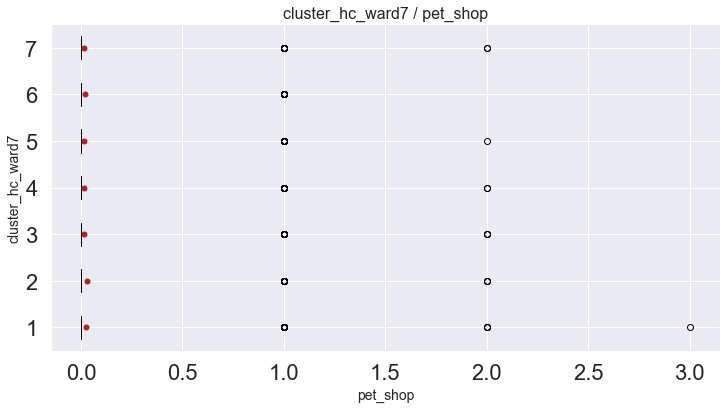

                 sum_sq      df         F    PR(>F)
C(catquali)    0.279672     6.0  2.091782  0.050862
Residual     202.466836  9086.0       NaN       NaN


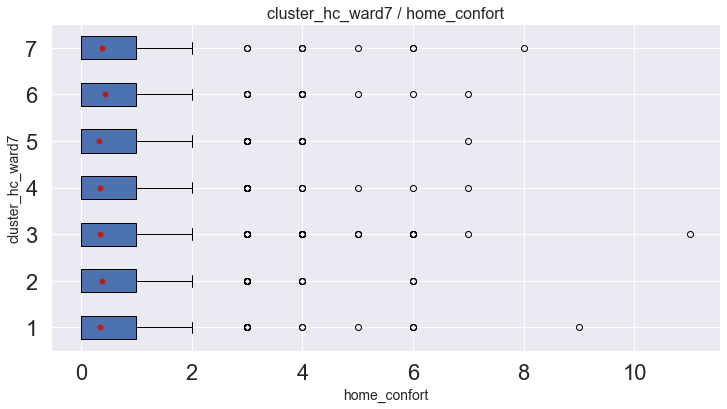

                  sum_sq      df         F    PR(>F)
C(catquali)     5.859054     6.0  1.995395  0.062706
Residual     4446.519259  9086.0       NaN       NaN


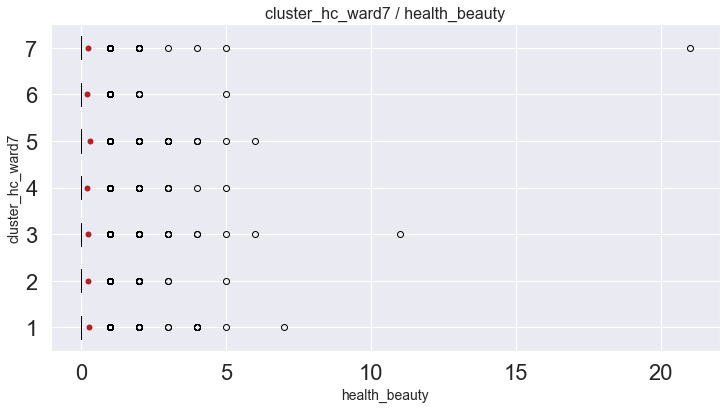

                  sum_sq      df         F    PR(>F)
C(catquali)     6.903332     6.0  3.382216  0.002474
Residual     3090.857143  9086.0       NaN       NaN


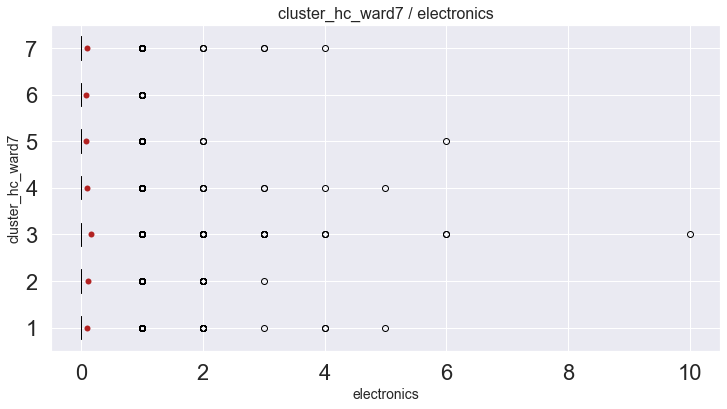

                  sum_sq      df          F        PR(>F)
C(catquali)     9.854993     6.0  10.637922  8.256747e-12
Residual     1402.881617  9086.0        NaN           NaN


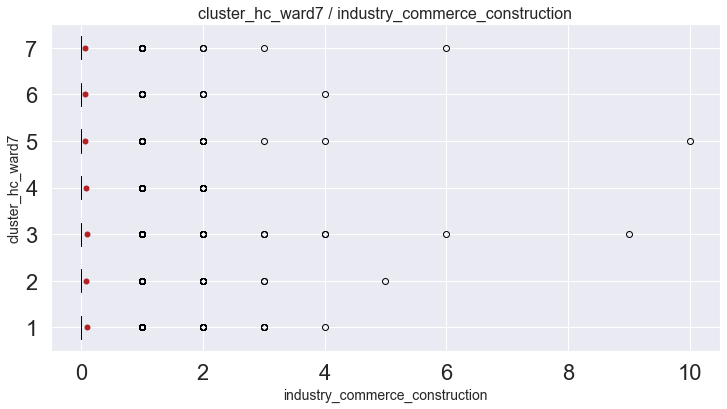

                  sum_sq      df         F    PR(>F)
C(catquali)     2.627212     6.0  3.327828  0.002827
Residual     1195.516635  9086.0       NaN       NaN


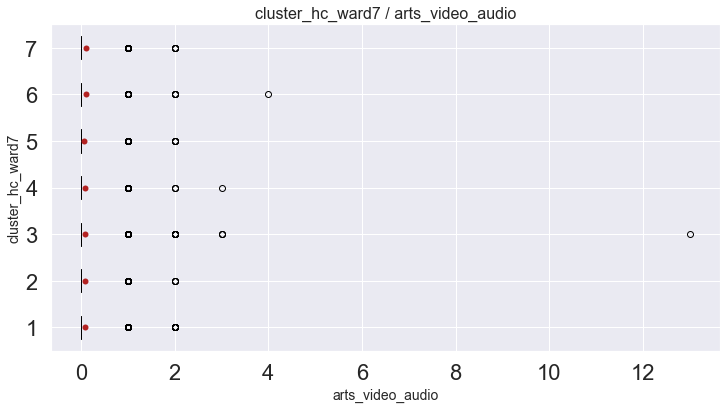

                 sum_sq      df         F    PR(>F)
C(catquali)    1.113473     6.0  1.723469  0.111151
Residual     978.358208  9086.0       NaN       NaN


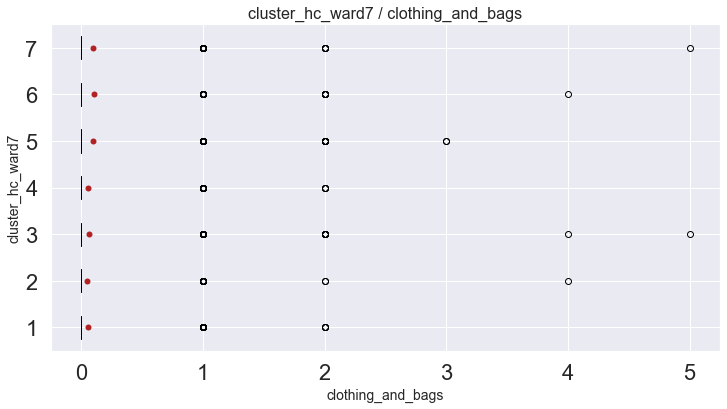

                 sum_sq      df         F        PR(>F)
C(catquali)    3.351449     6.0  6.661288  4.790060e-07
Residual     761.896324  9086.0       NaN           NaN


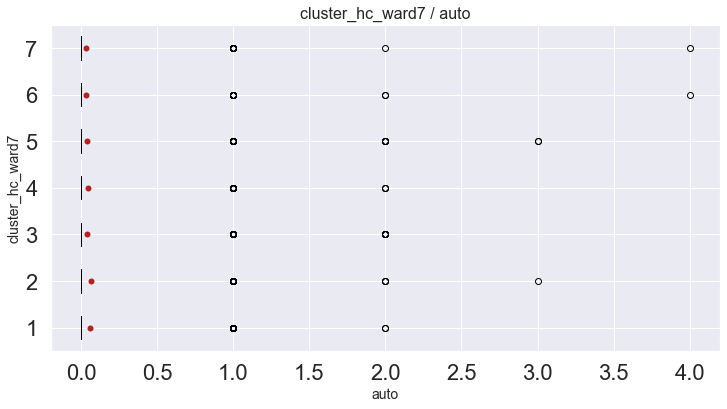

                 sum_sq      df         F    PR(>F)
C(catquali)    1.141779     6.0  3.547037  0.001646
Residual     487.458683  9086.0       NaN       NaN


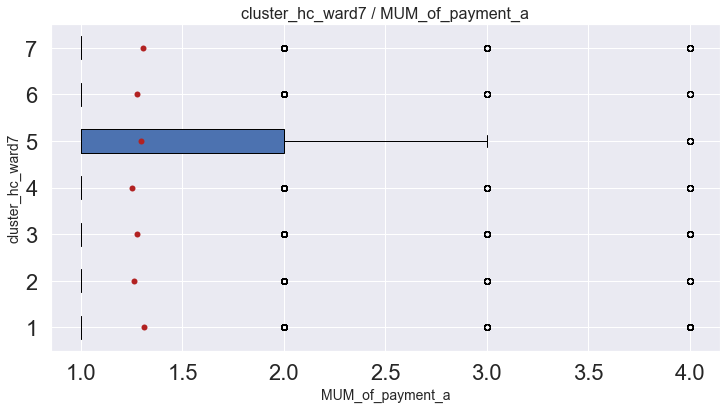

                  sum_sq      df         F    PR(>F)
C(catquali)     4.023565     6.0  1.974444  0.065598
Residual     3085.940803  9086.0       NaN       NaN


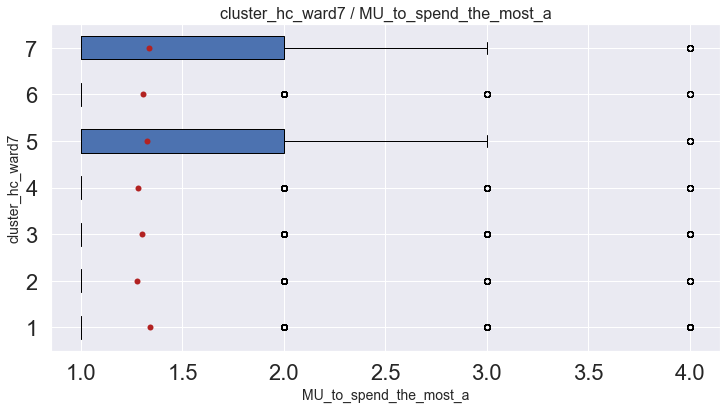

                  sum_sq      df         F    PR(>F)
C(catquali)     5.143545     6.0  2.261326  0.034946
Residual     3444.457467  9086.0       NaN       NaN


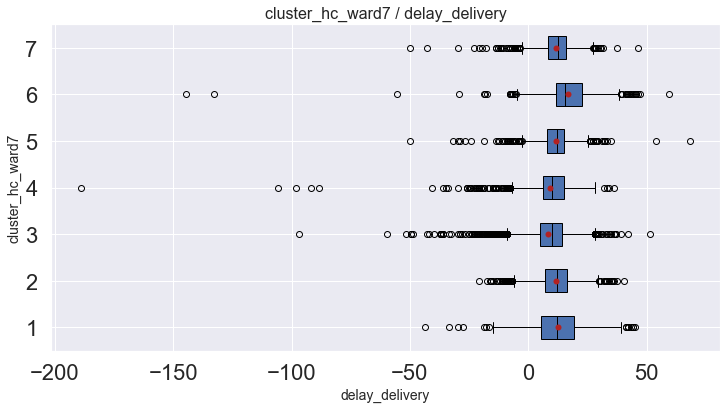

                    sum_sq      df          F        PR(>F)
C(catquali)   43138.101629     6.0  71.492418  2.049331e-87
Residual     913739.767041  9086.0        NaN           NaN


In [176]:
Z1 = linkage(X_reduc_full, method='ward')

c1, coph_dists = cophenet(Z1, pdist(X_reduc_full))
print(c1)
print('--'*4)

k = 7
X_reduc_full['cluster_hc_ward7'] = fcluster(Z1, k, criterion='maxclust')

print('number of individuals in each cluster')
print(X_reduc_full['cluster_hc_ward7'].value_counts())

plotcat = list(X_reduc_full)

for i in range(17) :
    boxplots(X_reduc_full, 'cluster_hc_ward7', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

## Single method
minimum nearest point of 2 clusters

cophenet coefficient : 0.2799798189726316
4    9058
2      25
3       3
1       2
5       1
8       1
6       1
9       1
7       1
Name: cluster_hc_single, dtype: int64


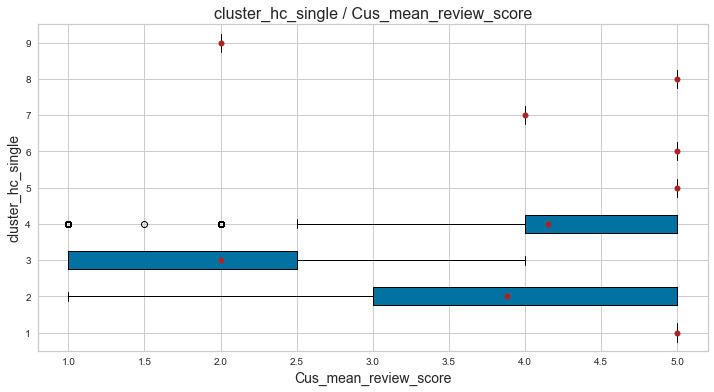

                   sum_sq      df         F    PR(>F)
C(catquali)     24.004240     8.0  1.842933  0.064479
Residual     14789.906685  9084.0       NaN       NaN


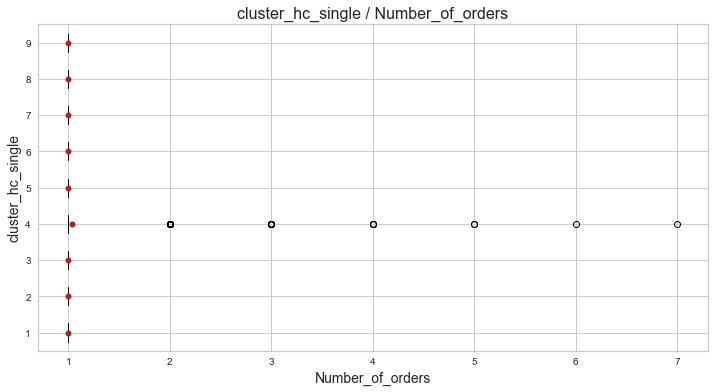

                 sum_sq      df         F    PR(>F)
C(catquali)    0.040050     8.0  0.110222  0.998889
Residual     412.594944  9084.0       NaN       NaN


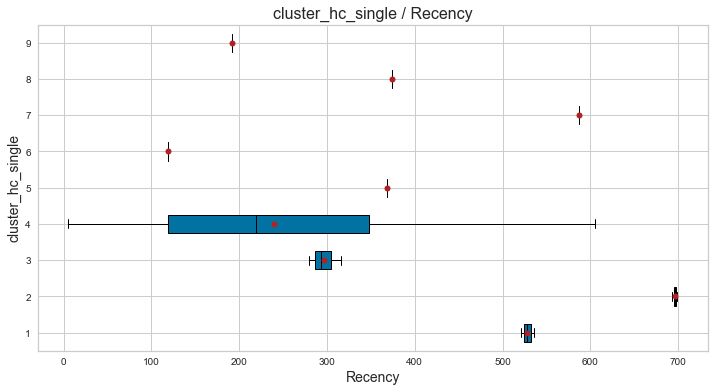

                   sum_sq      df         F        PR(>F)
C(catquali)  5.536569e+06     8.0  30.58752  1.067589e-47
Residual     2.055340e+08  9084.0       NaN           NaN


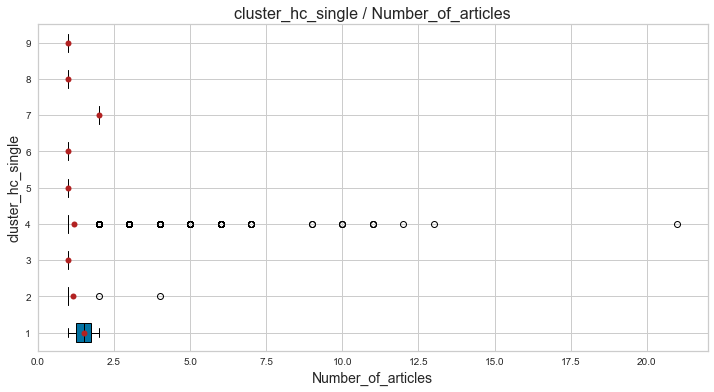

                  sum_sq      df         F    PR(>F)
C(catquali)     1.115954     8.0  0.313104  0.961483
Residual     4047.107074  9084.0       NaN       NaN


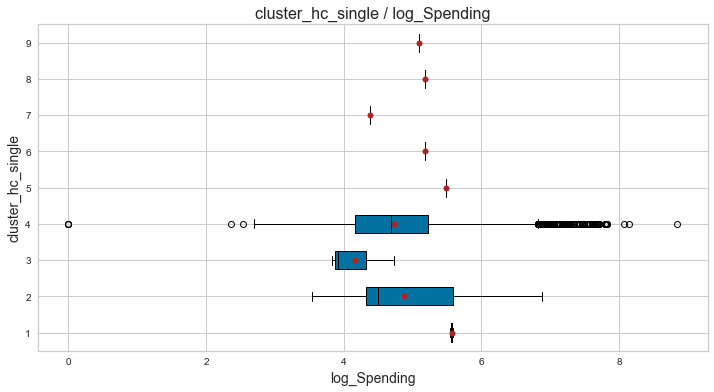

                  sum_sq      df         F    PR(>F)
C(catquali)     4.195371     8.0  0.803405  0.599506
Residual     5929.568528  9084.0       NaN       NaN


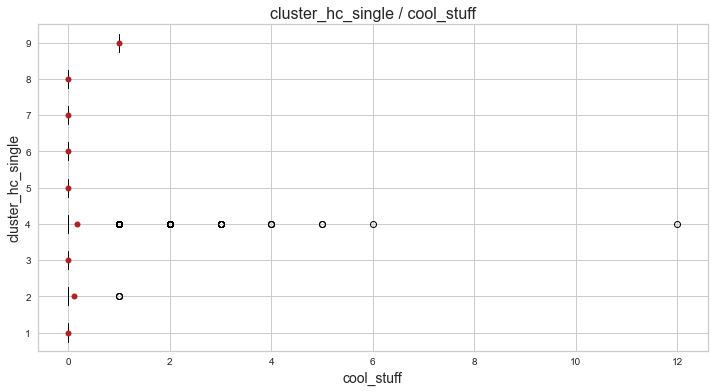

                  sum_sq      df        F    PR(>F)
C(catquali)     0.982455     8.0  0.68832  0.702297
Residual     1620.726112  9084.0      NaN       NaN


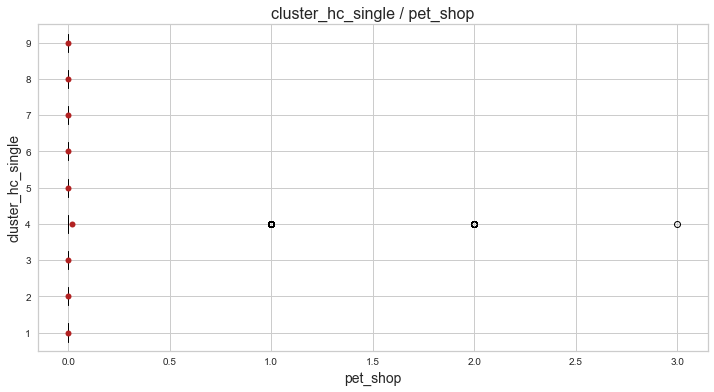

                 sum_sq      df         F   PR(>F)
C(catquali)    0.012571     8.0  0.070412  0.99979
Residual     202.733937  9084.0       NaN      NaN


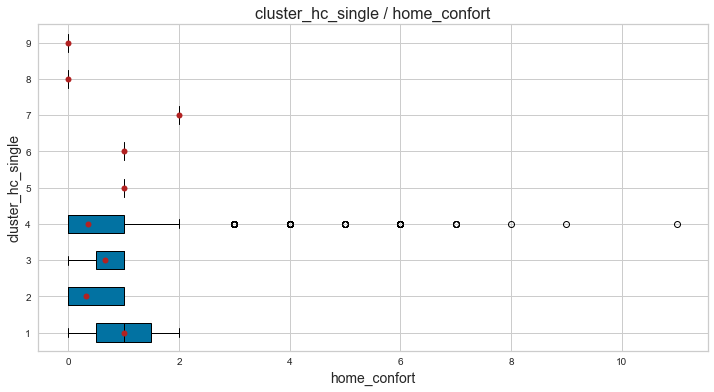

                  sum_sq      df         F   PR(>F)
C(catquali)     4.939343     8.0  1.261091  0.25901
Residual     4447.438970  9084.0       NaN      NaN


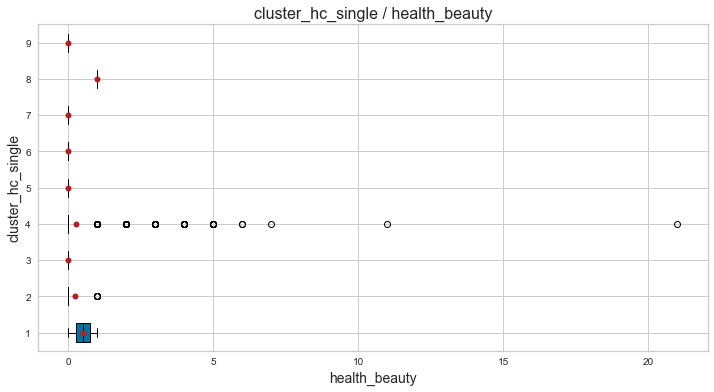

                  sum_sq      df         F    PR(>F)
C(catquali)     1.131365     8.0  0.414859  0.912748
Residual     3096.629110  9084.0       NaN       NaN


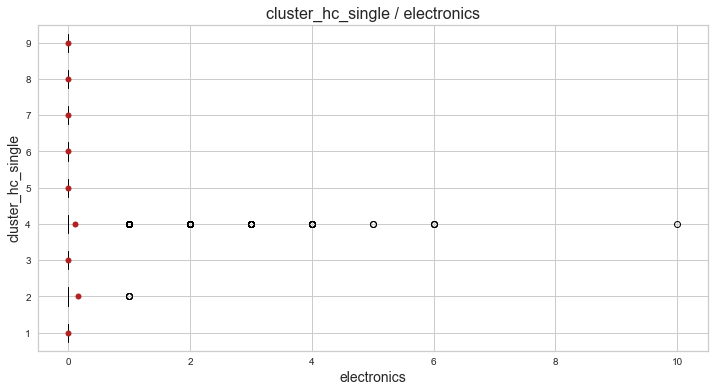

                  sum_sq      df         F    PR(>F)
C(catquali)     0.182859     8.0  0.146994  0.996871
Residual     1412.553751  9084.0       NaN       NaN


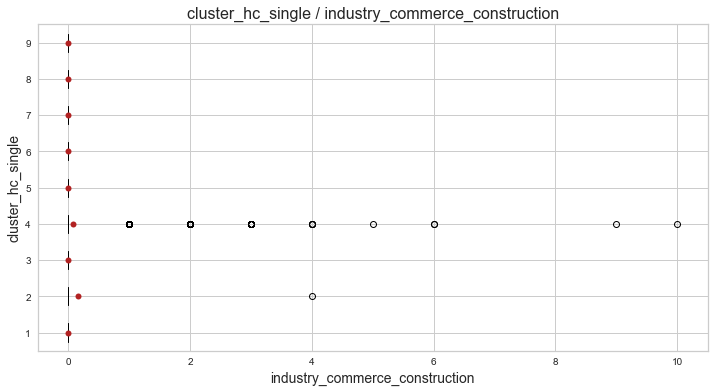

                  sum_sq      df         F    PR(>F)
C(catquali)     0.215510     8.0  0.204279  0.990241
Residual     1197.928337  9084.0       NaN       NaN


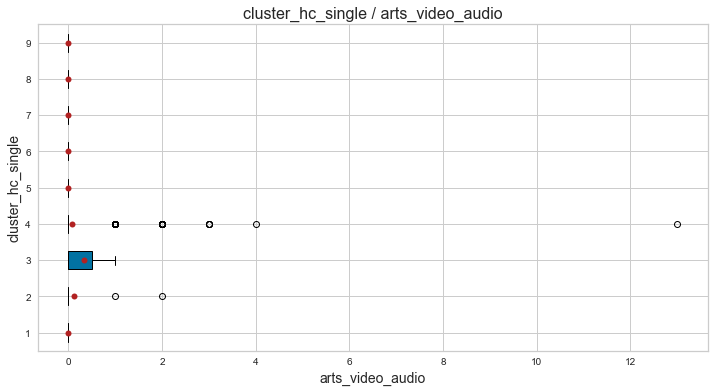

                 sum_sq      df        F    PR(>F)
C(catquali)    0.267907     8.0  0.31067  0.962388
Residual     979.203774  9084.0      NaN       NaN


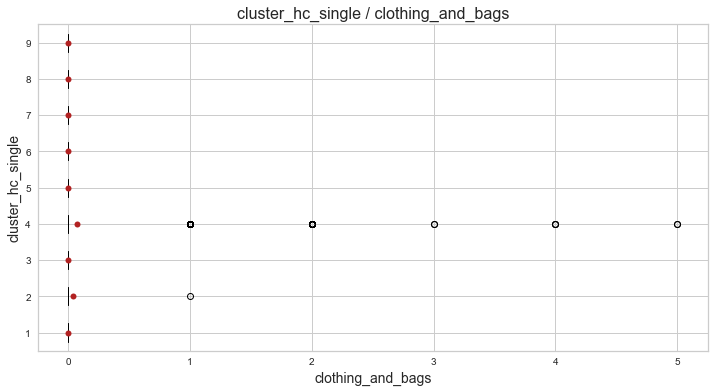

                 sum_sq      df         F    PR(>F)
C(catquali)    0.074481     8.0  0.110528  0.998878
Residual     765.173292  9084.0       NaN       NaN


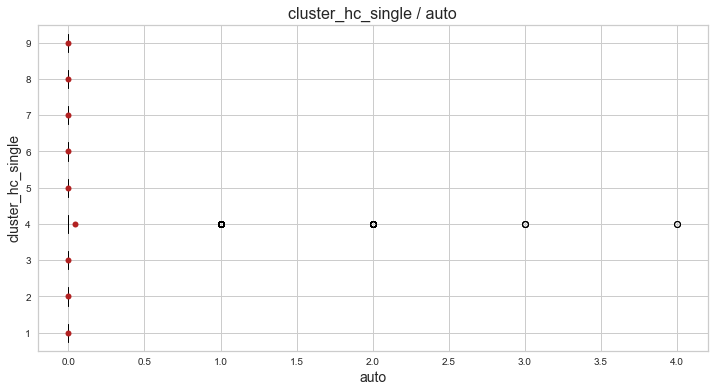

                 sum_sq      df         F    PR(>F)
C(catquali)    0.074960     8.0  0.174232  0.994328
Residual     488.525502  9084.0       NaN       NaN


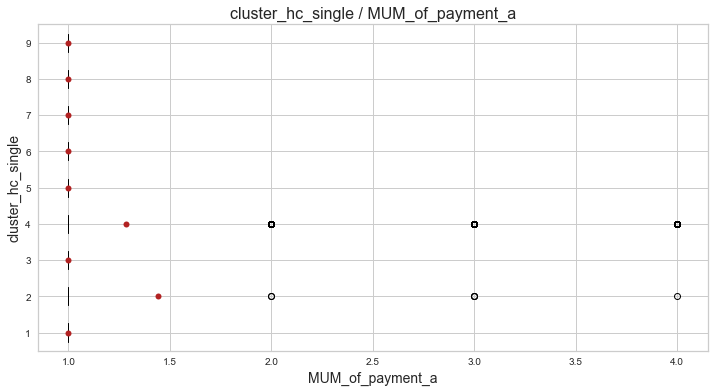

                  sum_sq      df         F    PR(>F)
C(catquali)     1.415651     8.0  0.520462  0.842021
Residual     3088.548717  9084.0       NaN       NaN


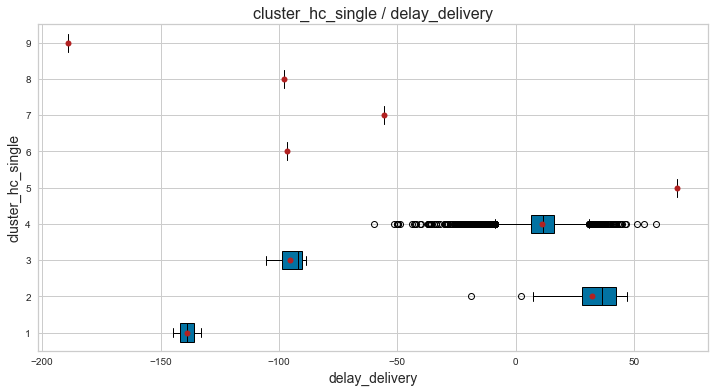

                    sum_sq      df           F  PR(>F)
C(catquali)  161356.936004     8.0  230.315499     0.0
Residual     795520.932666  9084.0         NaN     NaN


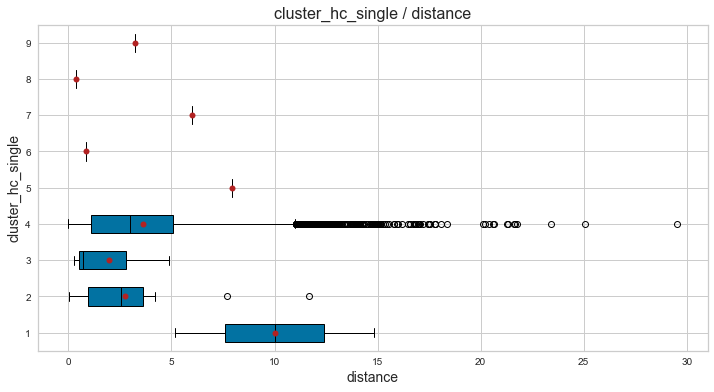

                   sum_sq      df        F    PR(>F)
C(catquali)    151.658213     8.0  1.82267  0.067967
Residual     94481.142178  9084.0      NaN       NaN


In [55]:
Z2 = linkage(X_reduc_full, method='single')

c2, coph_dists = cophenet(Z2, pdist(X_reduc_full))
print('cophenet coefficient :', c2)

k = 9
X_reduc_full['cluster_hc_single'] = fcluster(Z2, k, criterion='maxclust')

print(X_reduc_full['cluster_hc_single'].value_counts())

plotcat = list(X_reduc_full)

for i in range(17) :
    boxplots(X_reduc_full, 'cluster_hc_single', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

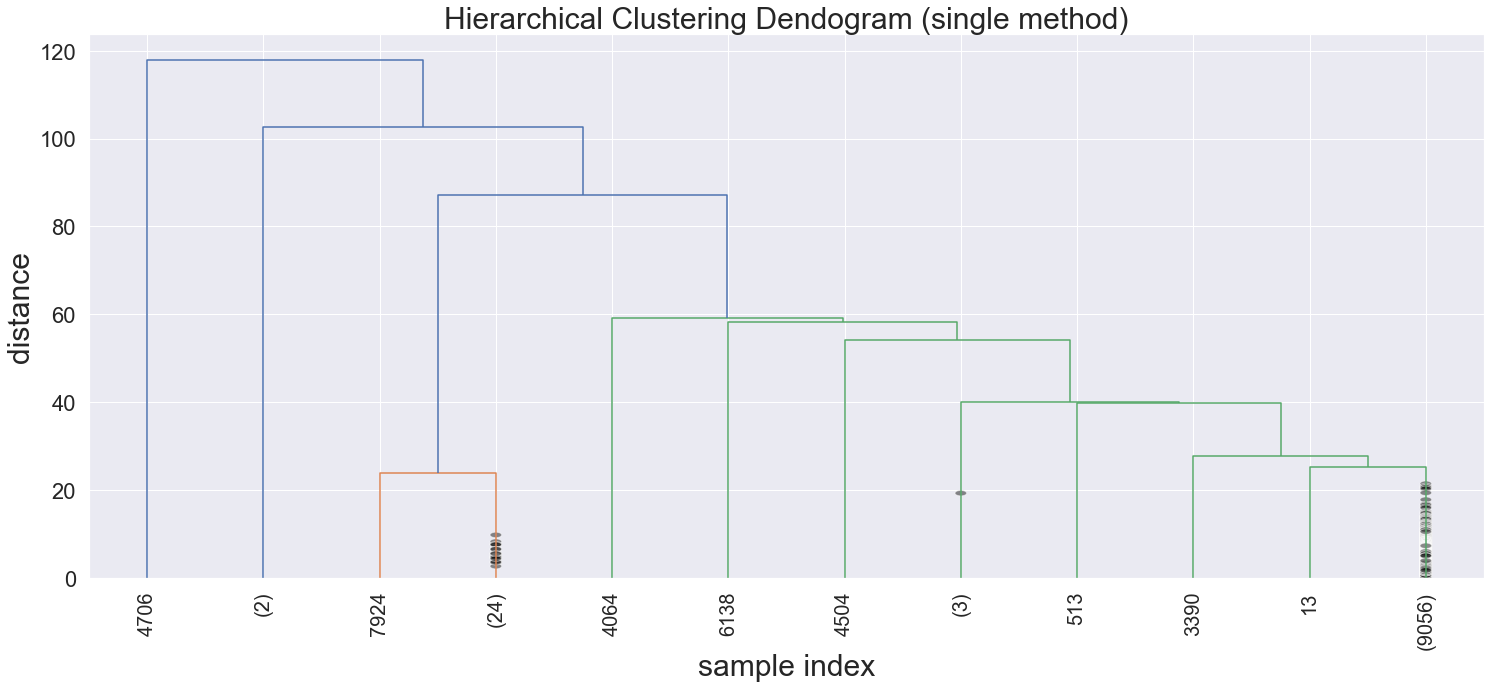

total time:  21.00919008255005 sec


In [178]:
startt = time.time()

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram (single method)', fontsize = 30)
plt.xlabel('sample index', fontsize = 30)
plt.ylabel('distance', fontsize = 30)
dendrogram(
    Z2,
    truncate_mode = 'lastp', # shows only the last p merged clusters
    p = 12, # show the last x merged clusters
    #show_leaf_counts = False, # otherwise numbers in brackets are counts
    leaf_rotation = 90., # rotates the x axis labels of x degrees
    leaf_font_size = 20, # font size for the x axis labels
    show_contracted = True, # to get a distribution impression in trunckated braches
)

plt.show()

endt = time.time()
print("total time: ",(endt - startt),"sec")

## Complete method
maximize the farest distance between 2 points of the clusters

0.7192221746853195
4    3151
8    2258
5    2103
9     835
3     713
1      25
6       4
2       3
7       1
Name: cluster_hc_complete, dtype: int64


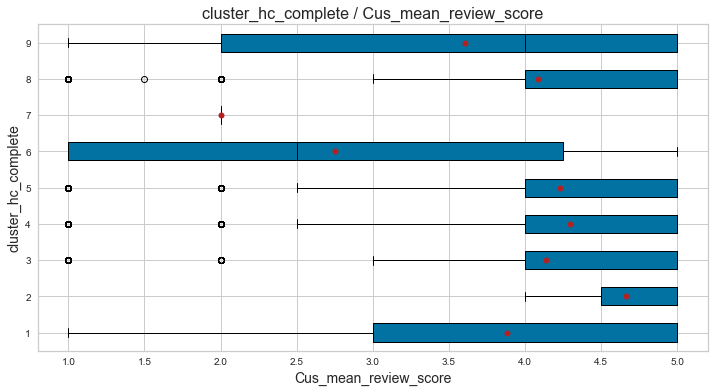

                   sum_sq      df          F        PR(>F)
C(catquali)    354.479196     8.0  27.837271  3.695150e-43
Residual     14459.431729  9084.0        NaN           NaN


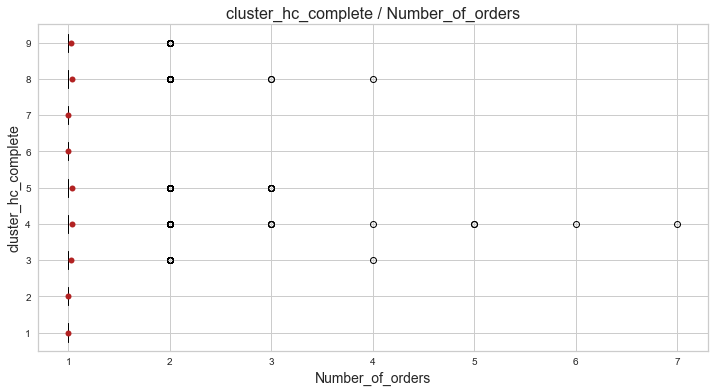

                 sum_sq      df        F    PR(>F)
C(catquali)    0.201756     8.0  0.55547  0.814996
Residual     412.433238  9084.0      NaN       NaN


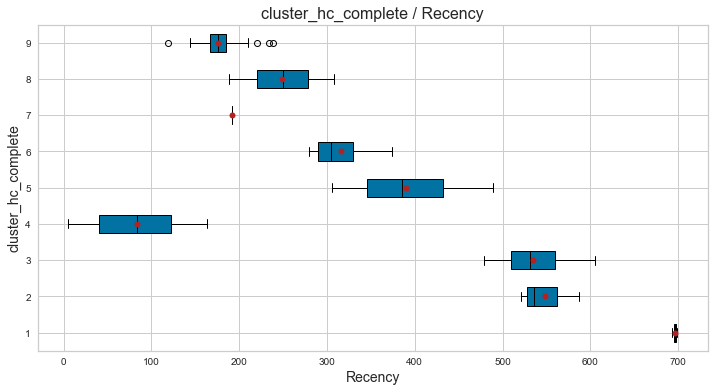

                   sum_sq      df             F  PR(>F)
C(catquali)  1.958190e+08     8.0  14579.006928     0.0
Residual     1.525155e+07  9084.0           NaN     NaN


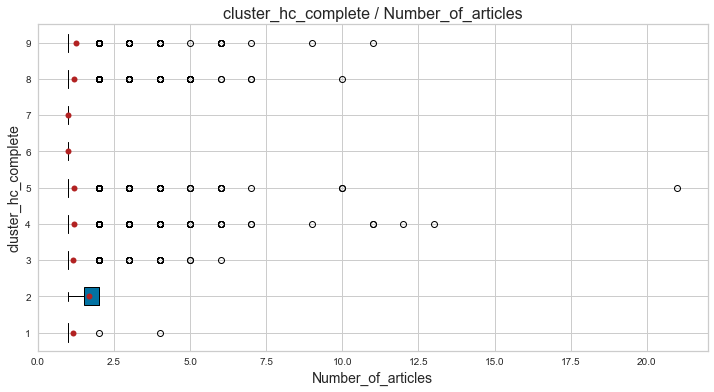

                  sum_sq      df         F    PR(>F)
C(catquali)     4.268731     8.0  1.198615  0.295215
Residual     4043.954298  9084.0       NaN       NaN


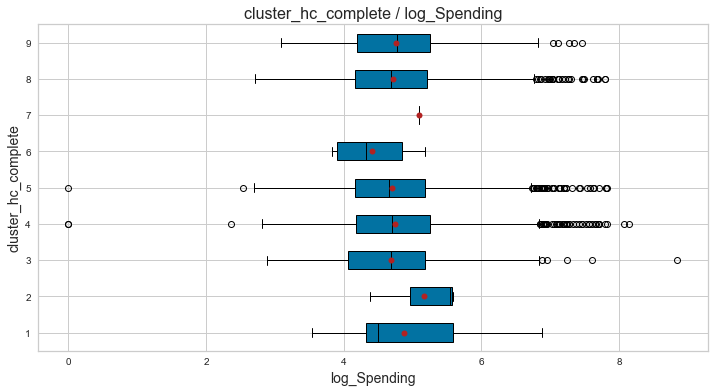

                  sum_sq      df        F    PR(>F)
C(catquali)     5.759118     8.0  1.10315  0.357375
Residual     5928.004781  9084.0      NaN       NaN


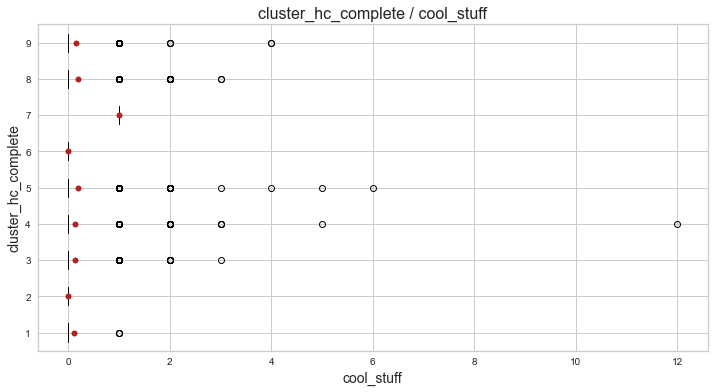

                  sum_sq      df         F    PR(>F)
C(catquali)     5.997924     8.0  4.215261  0.000047
Residual     1615.710643  9084.0       NaN       NaN


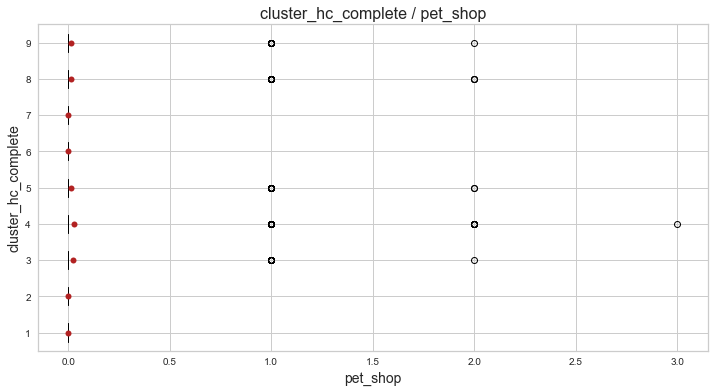

                 sum_sq      df         F    PR(>F)
C(catquali)    0.302280     8.0  1.695475  0.094034
Residual     202.444228  9084.0       NaN       NaN


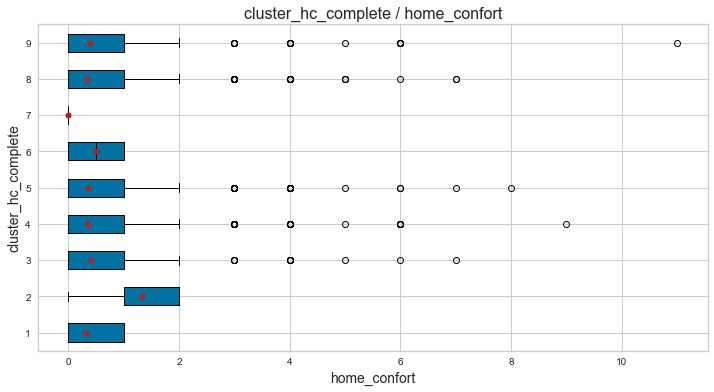

                  sum_sq      df        F    PR(>F)
C(catquali)     6.864373     8.0  1.75334  0.081232
Residual     4445.513940  9084.0      NaN       NaN


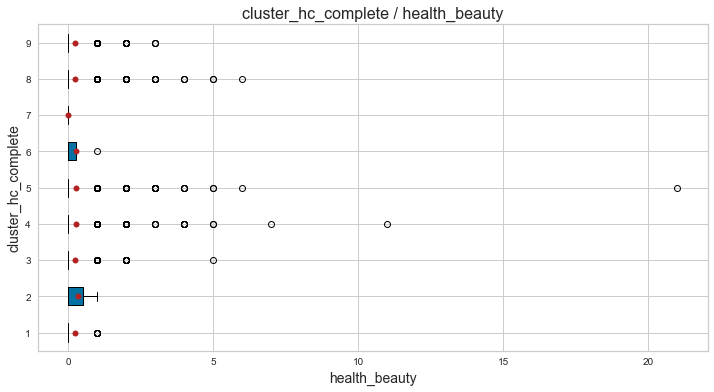

                  sum_sq      df         F    PR(>F)
C(catquali)     3.463810     8.0  1.271099  0.253537
Residual     3094.296665  9084.0       NaN       NaN


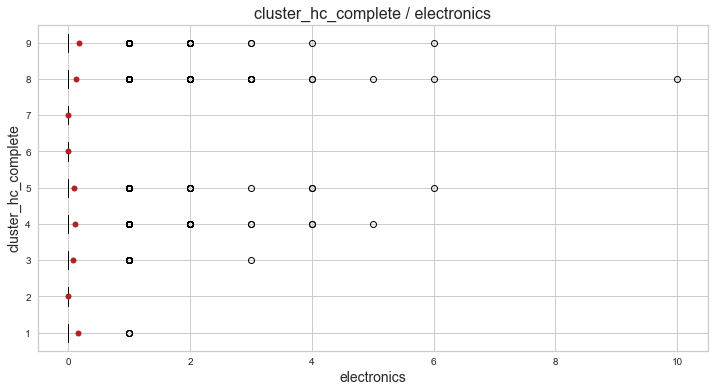

                  sum_sq      df         F    PR(>F)
C(catquali)     5.470729     8.0  4.414242  0.000024
Residual     1407.265882  9084.0       NaN       NaN


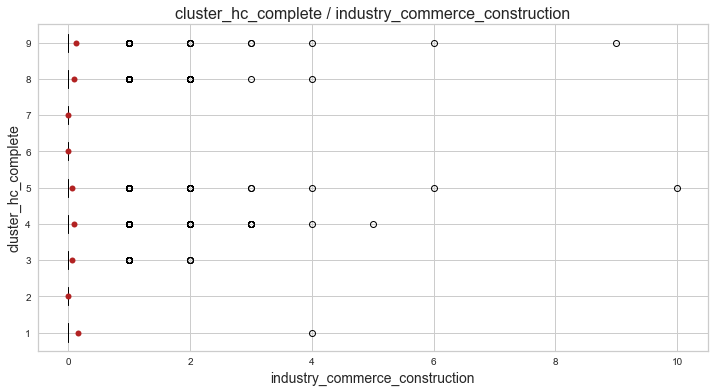

                  sum_sq      df        F    PR(>F)
C(catquali)     3.028531     8.0  2.87746  0.003367
Residual     1195.115316  9084.0      NaN       NaN


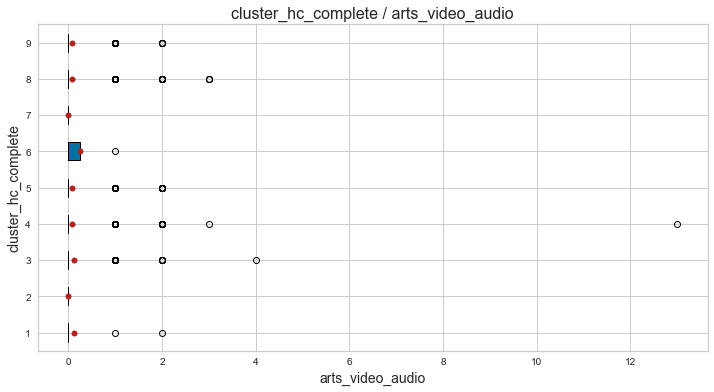

                 sum_sq      df         F    PR(>F)
C(catquali)    1.032249     8.0  1.197947  0.295621
Residual     978.439433  9084.0       NaN       NaN


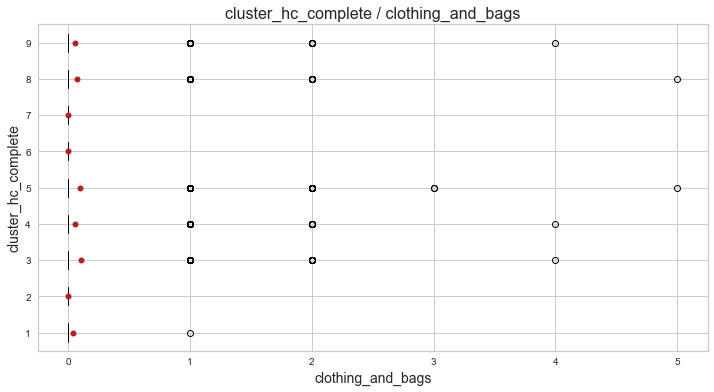

                 sum_sq      df         F    PR(>F)
C(catquali)    3.242767     8.0  4.832202  0.000006
Residual     762.005006  9084.0       NaN       NaN


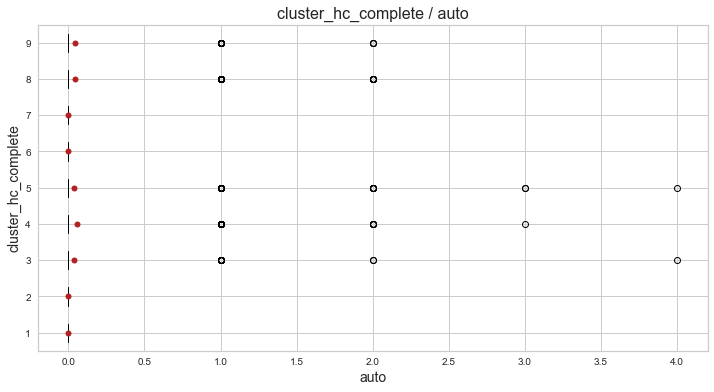

                 sum_sq      df        F    PR(>F)
C(catquali)    1.011086     8.0  2.35462  0.015832
Residual     487.589376  9084.0      NaN       NaN


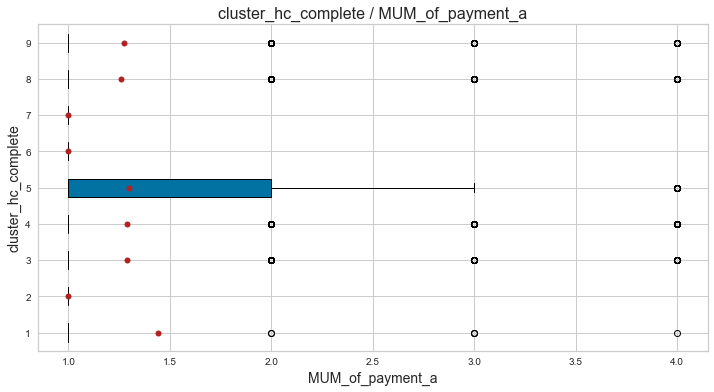

                  sum_sq      df         F    PR(>F)
C(catquali)     3.072325     8.0  1.130142  0.338965
Residual     3086.892043  9084.0       NaN       NaN


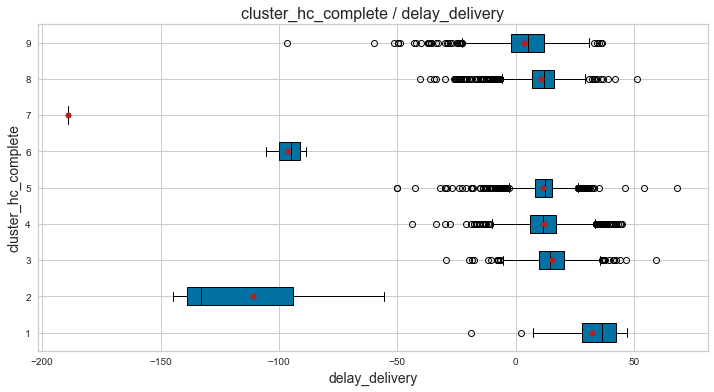

                    sum_sq      df           F  PR(>F)
C(catquali)  203453.445512     8.0  306.628482     0.0
Residual     753424.423158  9084.0         NaN     NaN


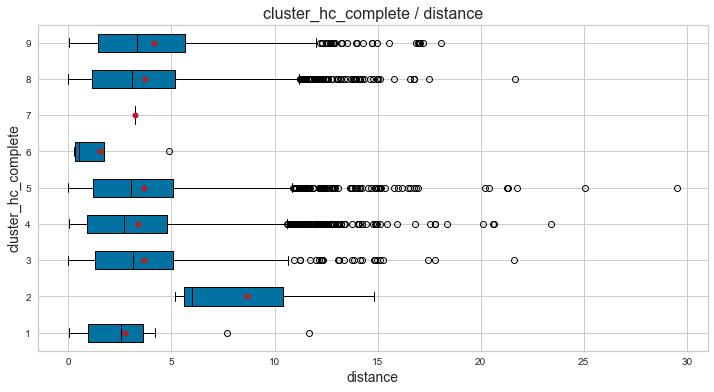

                   sum_sq      df         F        PR(>F)
C(catquali)    540.633909     8.0  6.524346  1.636929e-08
Residual     94092.166481  9084.0       NaN           NaN


In [51]:
Z3 = linkage(X_reduc_full, method='complete')

c3, coph_dists = cophenet(Z3, pdist(X_reduc_full))
print(c3)

k = 9
X_reduc_full['cluster_hc_complete'] = fcluster(Z3, k, criterion='maxclust')

print(X_reduc_full['cluster_hc_complete'].value_counts())

plotcat = list(X_reduc_full)

for i in range(17) :
    boxplots(X_reduc_full, 'cluster_hc_complete', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

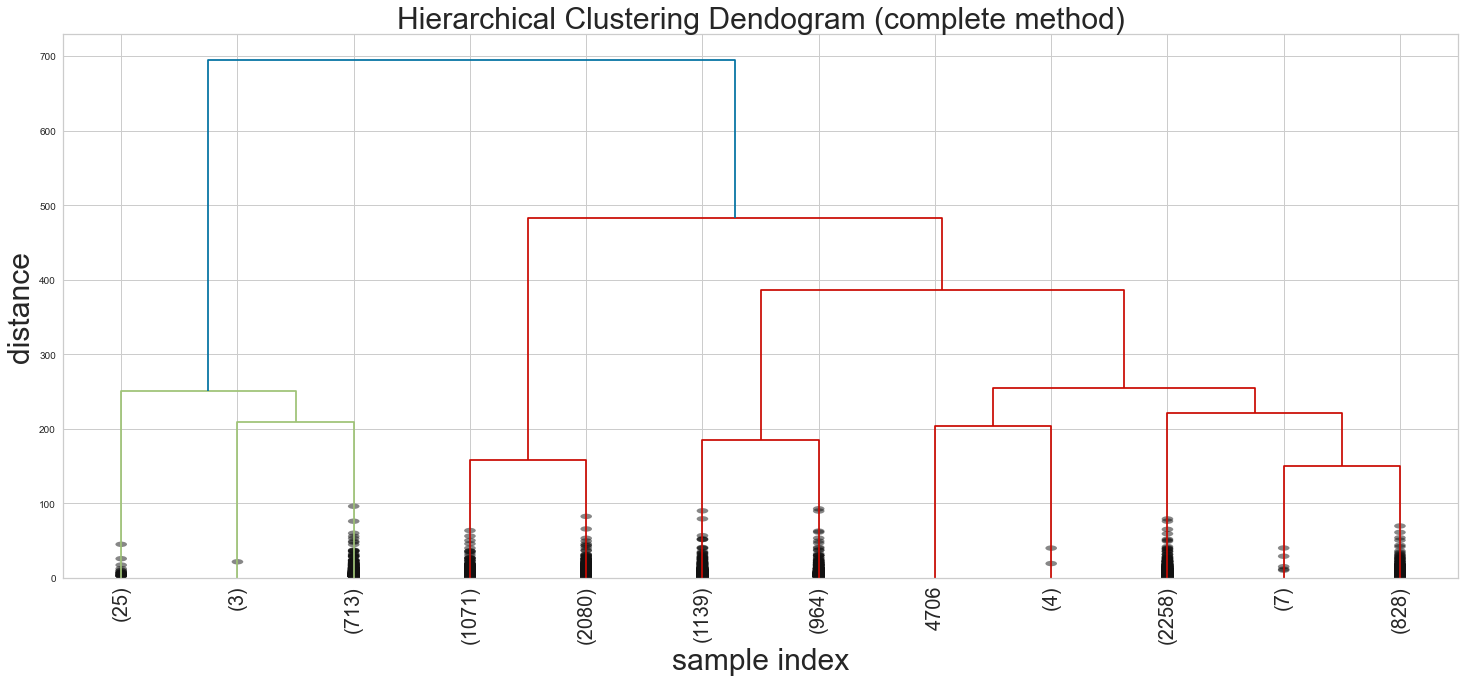

total time:  18.883313179016113 sec


In [52]:
startt = time.time()

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram (complete method)', fontsize = 30)
plt.xlabel('sample index', fontsize = 30)
plt.ylabel('distance', fontsize = 30)
dendrogram(
    Z3,
    truncate_mode = 'lastp', # shows only the last p merged clusters
    p = 12, # show the last x merged clusters
    #show_leaf_counts = False, # otherwise numbers in brackets are counts
    leaf_rotation = 90., # rotates the x axis labels of x degrees
    leaf_font_size = 20, # font size for the x axis labels
    show_contracted = True, # to get a distribution impression in trunckated braches
)

plt.show()

endt = time.time()
print("total time: ",(endt - startt),"sec")

In [53]:
X_reduc_full['cluster_comp'] = fcluster(Z3, k, criterion='maxclust')

In [54]:
polarplt(X_reduc_full, 'cluster_comp', selected_full)

In [72]:
X_reduc_full['cluster_comp'].value_counts()

4    3151
8    2258
5    2103
9     835
3     713
1      25
6       4
2       3
7       1
Name: cluster_comp, dtype: int64

## Centroid

0.7216486212525008
--------
number of individuals in each cluster
7    2778
5    2636
4    2466
8    1179
1      25
6       4
9       3
2       1
3       1
Name: cluster_hc_centroid, dtype: int64


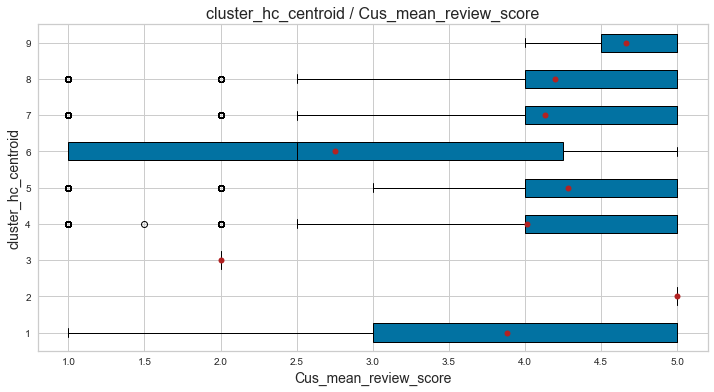

                   sum_sq      df         F        PR(>F)
C(catquali)    114.374982     8.0  8.835163  4.033206e-12
Residual     14699.535942  9084.0       NaN           NaN


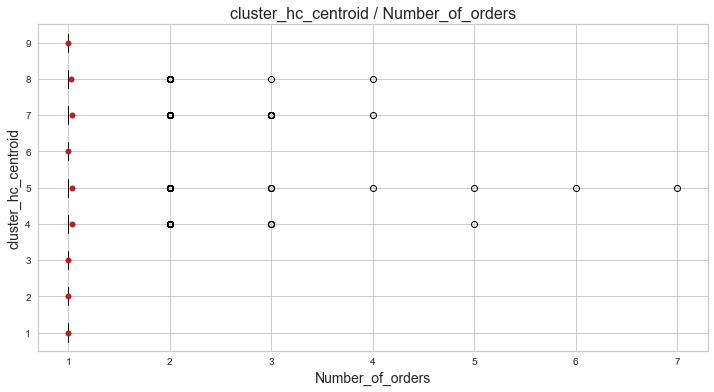

                 sum_sq      df         F    PR(>F)
C(catquali)    0.123989     8.0  0.341299  0.950095
Residual     412.511005  9084.0       NaN       NaN


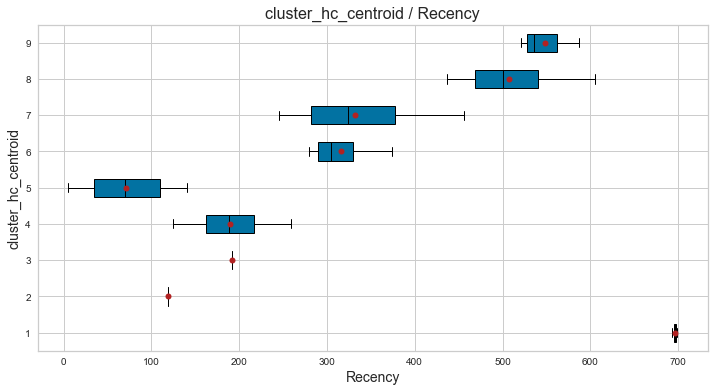

                   sum_sq      df             F  PR(>F)
C(catquali)  1.943135e+08     8.0  13167.160779     0.0
Residual     1.675706e+07  9084.0           NaN     NaN


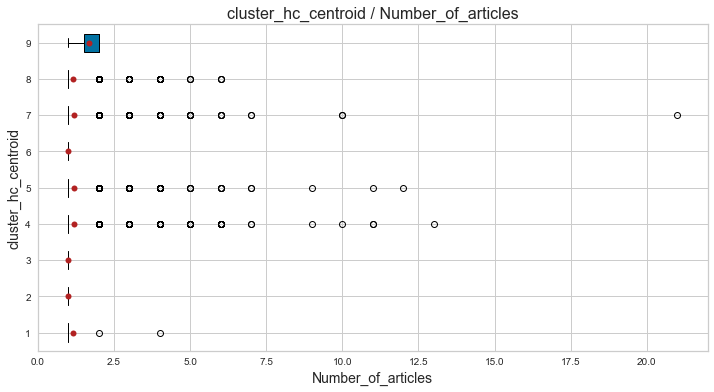

                  sum_sq      df         F    PR(>F)
C(catquali)     2.670336     8.0  0.749506  0.647674
Residual     4045.552693  9084.0       NaN       NaN


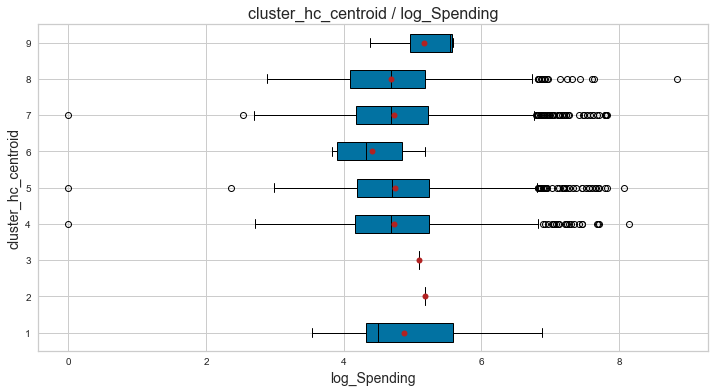

                  sum_sq      df         F    PR(>F)
C(catquali)     4.484400     8.0  0.858795  0.550718
Residual     5929.279499  9084.0       NaN       NaN


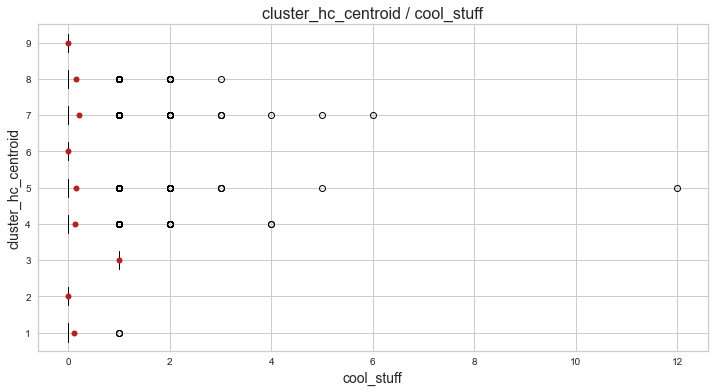

                  sum_sq      df         F        PR(>F)
C(catquali)     8.723544     8.0  6.141151  6.321401e-08
Residual     1612.985023  9084.0       NaN           NaN


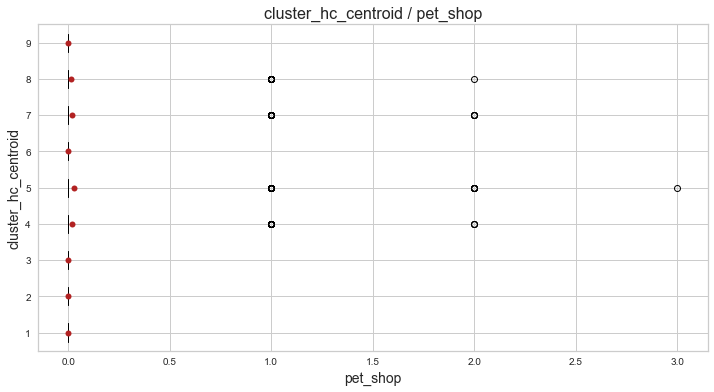

                 sum_sq      df         F    PR(>F)
C(catquali)    0.247377     8.0  1.387151  0.196424
Residual     202.499131  9084.0       NaN       NaN


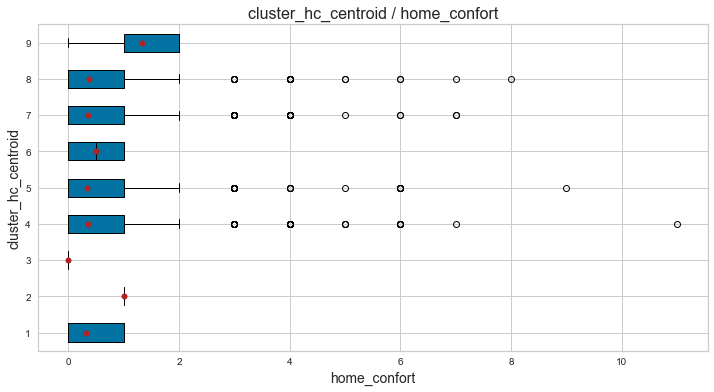

                  sum_sq      df        F  PR(>F)
C(catquali)     4.685998     8.0  1.19634  0.2966
Residual     4447.692315  9084.0      NaN     NaN


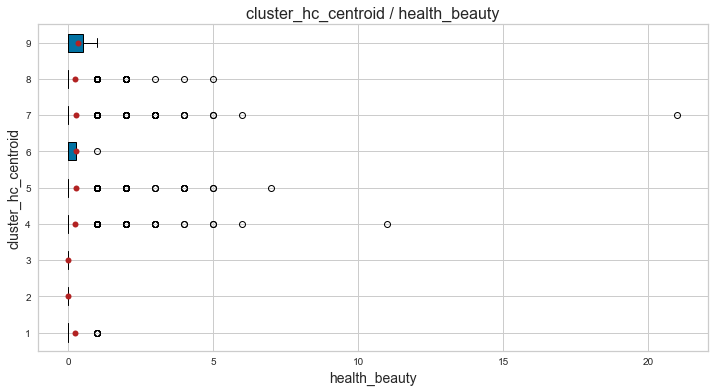

                  sum_sq      df         F    PR(>F)
C(catquali)     3.129094     8.0  1.148145  0.327049
Residual     3094.631381  9084.0       NaN       NaN


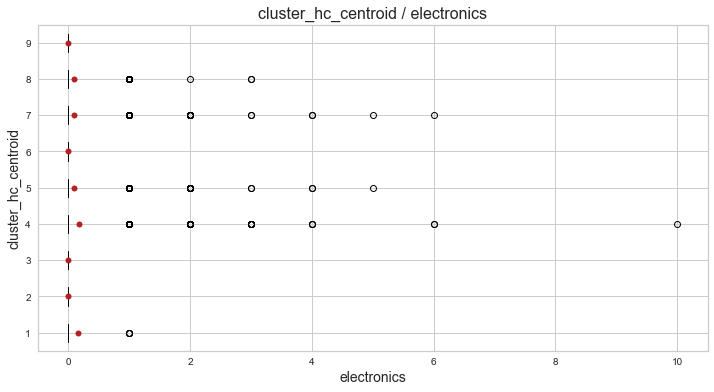

                  sum_sq      df         F        PR(>F)
C(catquali)     9.713155     8.0  7.861085  1.377373e-10
Residual     1403.023456  9084.0       NaN           NaN


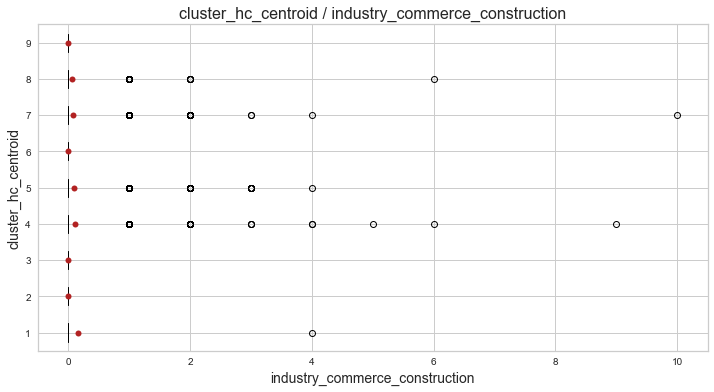

                  sum_sq      df         F    PR(>F)
C(catquali)     2.485823     8.0  2.360752  0.015556
Residual     1195.658024  9084.0       NaN       NaN


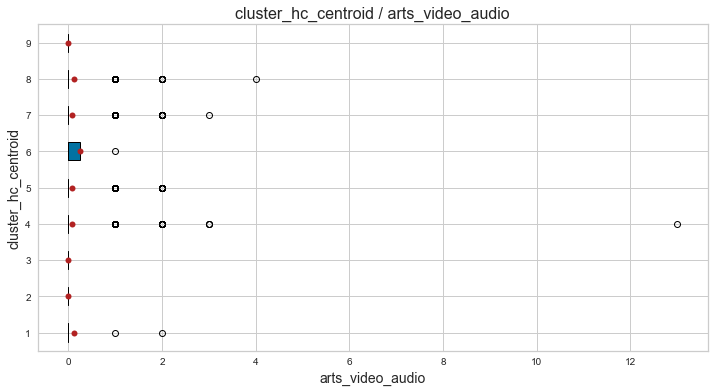

                 sum_sq      df         F    PR(>F)
C(catquali)    1.679784     8.0  1.950716  0.048517
Residual     977.791898  9084.0       NaN       NaN


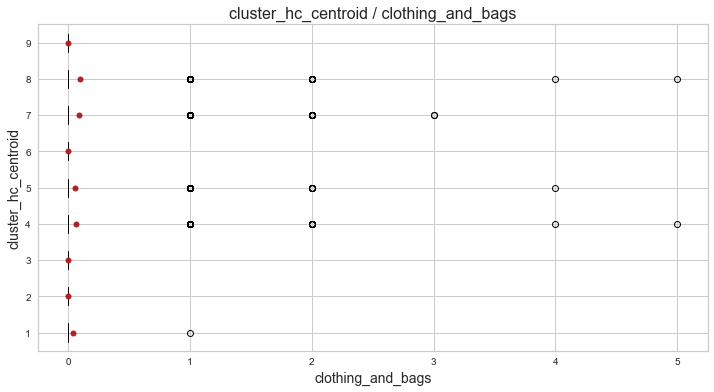

                 sum_sq      df         F    PR(>F)
C(catquali)    2.307370     8.0  3.434106  0.000593
Residual     762.940403  9084.0       NaN       NaN


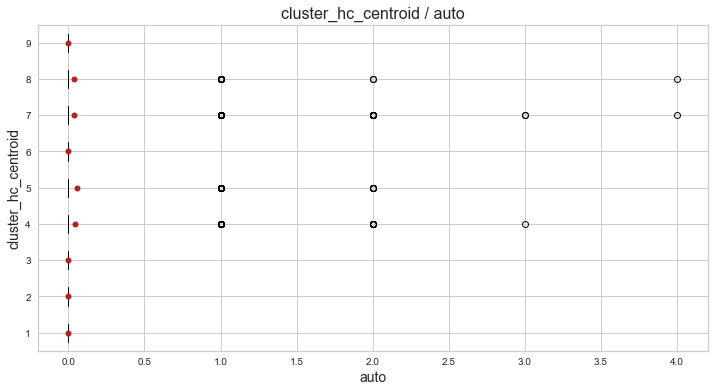

                 sum_sq      df         F   PR(>F)
C(catquali)    0.766159     8.0  1.783339  0.07523
Residual     487.834303  9084.0       NaN      NaN


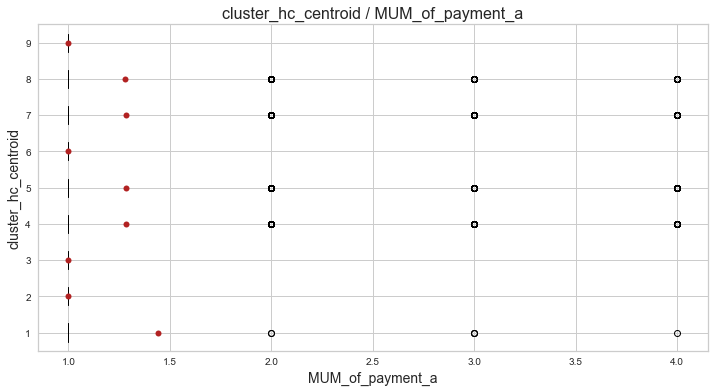

                  sum_sq      df         F    PR(>F)
C(catquali)     1.397083     8.0  0.513632  0.847113
Residual     3088.567285  9084.0       NaN       NaN


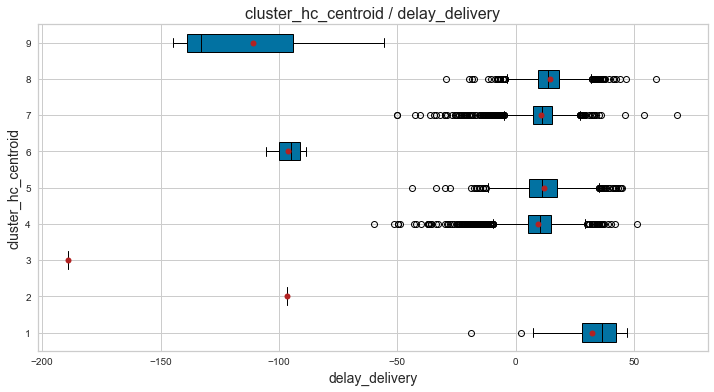

                    sum_sq      df           F  PR(>F)
C(catquali)  176747.289521     8.0  257.260198     0.0
Residual     780130.579149  9084.0         NaN     NaN


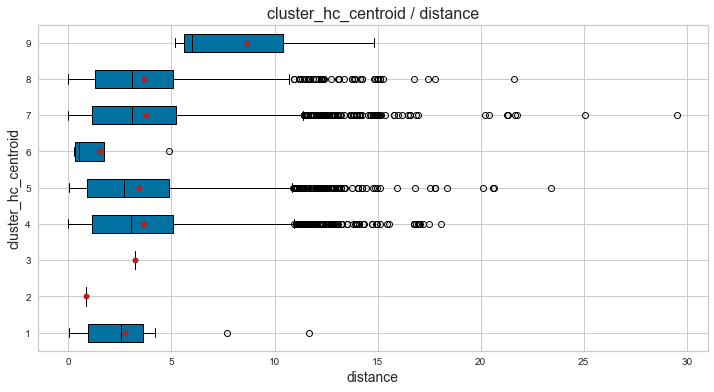

                   sum_sq      df         F    PR(>F)
C(catquali)    274.825148     8.0  3.307235  0.000887
Residual     94357.975243  9084.0       NaN       NaN


In [56]:
Z4 = linkage(X_reduc_full, method='centroid')

c4, coph_dists = cophenet(Z4, pdist(X_reduc_full))
print(c4)
print('--'*4)

k = 9
X_reduc_full['cluster_hc_centroid'] = fcluster(Z4, k, criterion='maxclust')

print('number of individuals in each cluster')
print(X_reduc_full['cluster_hc_centroid'].value_counts())

plotcat = list(X_reduc_full)

for i in range(17) :
    boxplots(X_reduc_full, 'cluster_hc_centroid', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)

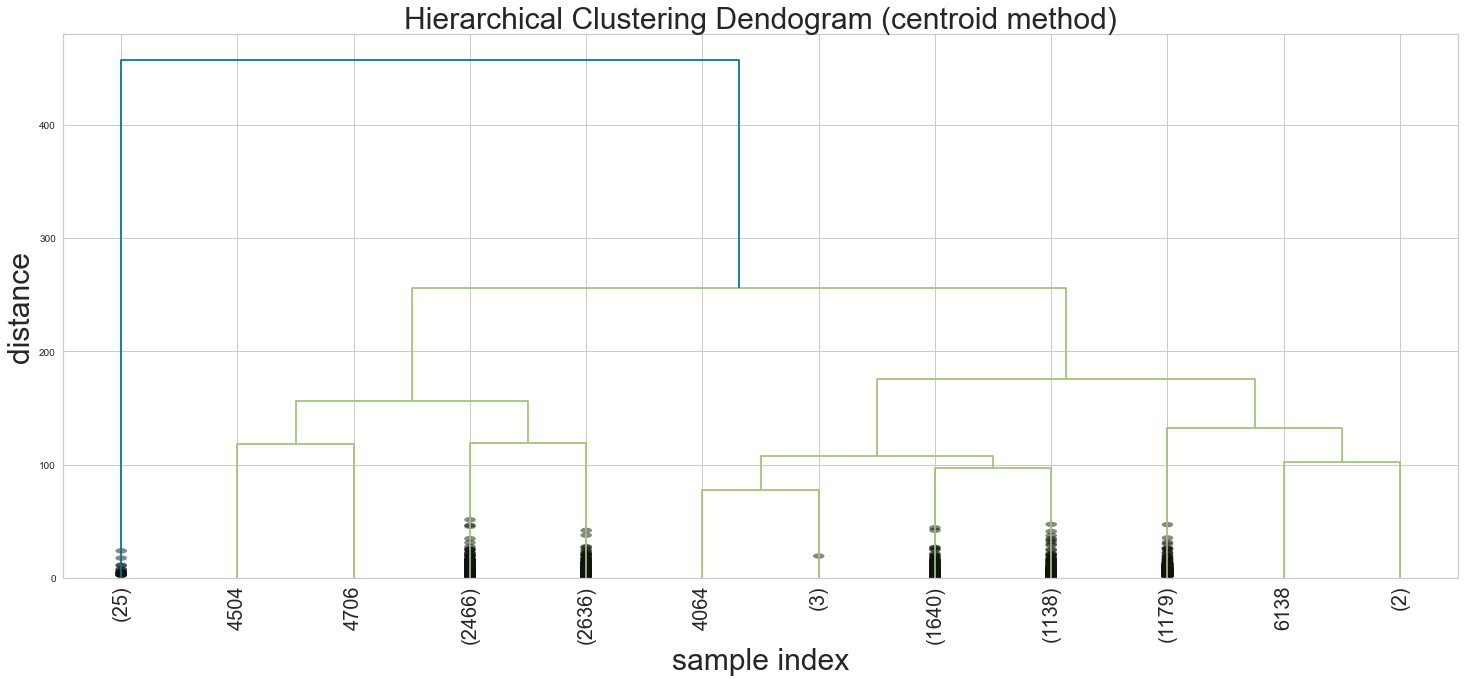

total time:  18.912319660186768 sec


In [57]:
startt = time.time()

plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendogram (centroid method)', fontsize = 30)
plt.xlabel('sample index', fontsize = 30)
plt.ylabel('distance', fontsize = 30)
dendrogram(
    Z4,
    truncate_mode = 'lastp', # shows only the last p merged clusters
    p = 12, # show the last x merged clusters
    #show_leaf_counts = False, # otherwise numbers in brackets are counts
    leaf_rotation = 90., # rotates the x axis labels of x degrees
    leaf_font_size = 20, # font size for the x axis labels
    show_contracted = True, # to get a distribution impression in trunckated braches
)

plt.show()

endt = time.time()
print("total time: ",(endt - startt),"sec")

In [58]:
X_reduc_full['cluster_cen'] = fcluster(Z4, k, criterion='maxclust')

In [59]:
polarplt(X_reduc_full, 'cluster_cen', selected_full)

---------------------------

<a id='dbsc' />

## DBSCAN  

In [184]:
start = time.time()

clustering = DBSCAN(eps=3, min_samples=2).fit(X_full)
X_full['db_labels'] = clustering.labels_

endt = time.time()
print("total time: ",(endt - start),"sec")

total time:  72.21668410301208 sec


In [185]:
DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

DBSCAN(eps=0.3, min_samples=10)

In [186]:
print(clustering.labels_) # the numeroted clusters (-1 is considered as noise)
print(clustering.core_sample_indices_) # indices of core elements ie. points with at least 'min_samples' within '0.3 eps'
                                       # ie. not noise

[   0    0    0 ...   -1 3179    0]
[    0     1     2 ... 90923 90925 90926]


In [187]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_full, labels))

Estimated number of clusters: 3565
Estimated number of noise points: 19334
Silhouette Coefficient: -0.624


In [60]:
start = time.time()

db1 = DBSCAN(eps=20, min_samples=50).fit(X_full)
db1_5_2 = db1.labels_

model_v = db1_5_2

core_samples_mask = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask[db1.core_sample_indices_] = True
labels = db1.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_full, labels))

endt = time.time()
print("total time: ",(endt - start),"sec")

Estimated number of clusters: 2
Estimated number of noise points: 126
Silhouette Coefficient: 0.227
total time:  152.11869311332703 sec


In [61]:
start = time.time()

eps = [10, 10, 15, 20]
min_s = [50, 10, 15, 20]

for i in range(len(eps)) :
        
    db = DBSCAN(eps=eps[i], min_samples=min_s[i]).fit(X_full)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print('eps :', eps[i], 'min_samples :', min_s[i])
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_full, labels))
    
    print('--'*10)

endt = time.time()
print("total time: ",(endt - start),"sec")

eps : 10 min_samples : 50
Estimated number of clusters: 2
Estimated number of noise points: 725
Silhouette Coefficient: 0.170
--------------------
eps : 10 min_samples : 10
Estimated number of clusters: 3
Estimated number of noise points: 342
Silhouette Coefficient: -0.009
--------------------
eps : 15 min_samples : 15
Estimated number of clusters: 2
Estimated number of noise points: 154
Silhouette Coefficient: 0.204
--------------------
eps : 20 min_samples : 20
Estimated number of clusters: 2
Estimated number of noise points: 101
Silhouette Coefficient: 0.238
--------------------
total time:  550.3250691890717 sec


In [190]:
start = time.time()

eps = [25, 30, 20, 15]
min_s = [25, 30, 15, 20]

for i in range(len(eps)) :
        
    db = DBSCAN(eps=eps[i], min_samples=min_s[i]).fit(X_full)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print('eps / min_samples:', eps[i],'/', min_s[i])
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_full, labels))
    
    print('--'*10)

endt = time.time()
print("total time: ",(endt - start),"sec")

eps / min_samples: 25 / 25
Estimated number of clusters: 63
Estimated number of noise points: 7763
Silhouette Coefficient: -0.479
--------------------
eps / min_samples: 30 / 30
Estimated number of clusters: 52
Estimated number of noise points: 6973
Silhouette Coefficient: -0.223
--------------------
eps / min_samples: 20 / 15
Estimated number of clusters: 127
Estimated number of noise points: 7436
Silhouette Coefficient: -0.543
--------------------
eps / min_samples: 15 / 20
Estimated number of clusters: 53
Estimated number of noise points: 9739
Silhouette Coefficient: -0.650
--------------------
total time:  754.3389916419983 sec


In [62]:
start = time.time()

eps = [3, 5, 10, 10]
min_s = [60, 60, 70, 80]

for i in range(len(eps)) :
        
    db = DBSCAN(eps=eps[i], min_samples=min_s[i]).fit(X_full)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print('eps / min_samples:', eps[i],'/', min_s[i])
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_full, labels))
    
    print('--'*10)

endt = time.time()
print("total time: ",(endt - start),"sec")

eps / min_samples: 3 / 60
Estimated number of clusters: 26
Estimated number of noise points: 70535
Silhouette Coefficient: -0.631
--------------------
eps / min_samples: 5 / 60
Estimated number of clusters: 2
Estimated number of noise points: 12169
Silhouette Coefficient: 0.027
--------------------
eps / min_samples: 10 / 70
Estimated number of clusters: 2
Estimated number of noise points: 878
Silhouette Coefficient: 0.159
--------------------
eps / min_samples: 10 / 80
Estimated number of clusters: 2
Estimated number of noise points: 927
Silhouette Coefficient: 0.157
--------------------
total time:  735.0369803905487 sec


In [77]:
start = time.time()

eps = [10, 11, 12]
min_s = [4, 3, 3]

for i in range(len(eps)) :
        
    db = DBSCAN(eps=eps[i], min_samples=min_s[i]).fit(X_full)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print('eps / min_samples:', eps[i],'/', min_s[i])
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_full, labels))
    
    print('--'*10)

endt = time.time()
print("total time: ",(endt - start),"sec")

eps / min_samples: 10 / 4
Estimated number of clusters: 13
Estimated number of noise points: 216
Silhouette Coefficient: -0.619
--------------------
eps / min_samples: 11 / 3
Estimated number of clusters: 13
Estimated number of noise points: 142
Silhouette Coefficient: -0.485
--------------------
eps / min_samples: 12 / 3
Estimated number of clusters: 10
Estimated number of noise points: 115
Silhouette Coefficient: -0.381
--------------------
total time:  548.1491856575012 sec


In [82]:
start = time.time()

clusteringa = DBSCAN(eps=12, min_samples=10).fit(X_full)
X_full['db_labels_a'] = clusteringa.labels_

endt = time.time()
print("total time: ",(endt - start),"sec")

total time:  60.27207565307617 sec


In [83]:
X_full['db_labels_a'].value_counts()

 0    90451
 1      246
-1      230
Name: db_labels_a, dtype: int64

In [84]:
polarplt(X_full, 'db_labels_a', selected_full)

In [78]:
start = time.time()

clusteringb = DBSCAN(eps=12, min_samples=3).fit(X_full)
X_full['db_labels_b'] = clusteringb.labels_

endt = time.time()
print("total time: ",(endt - start),"sec")

total time:  79.21039986610413 sec


In [80]:
X_full['db_labels_b'].value_counts()

 0    90530
 1      246
-1      115
 4       10
 2        6
 6        5
 3        3
 5        3
 7        3
 8        3
 9        3
Name: db_labels_b, dtype: int64

In [81]:
polarplt(X_full, 'db_labels_b', selected_full)

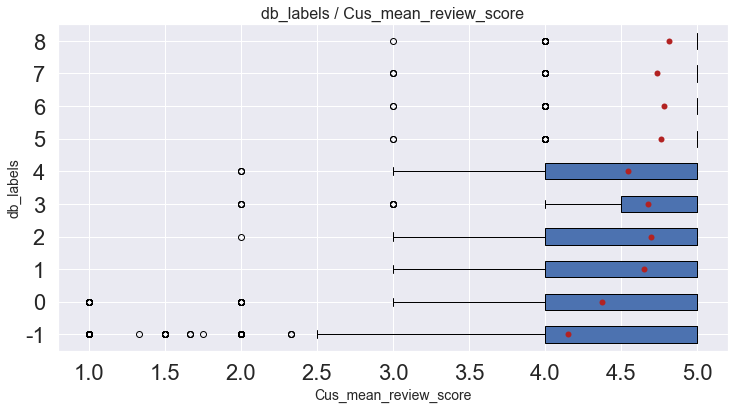

                    sum_sq       df          F        PR(>F)
C(catquali)     277.357066      9.0  18.886655  6.702165e-32
Residual     148349.738152  90917.0        NaN           NaN


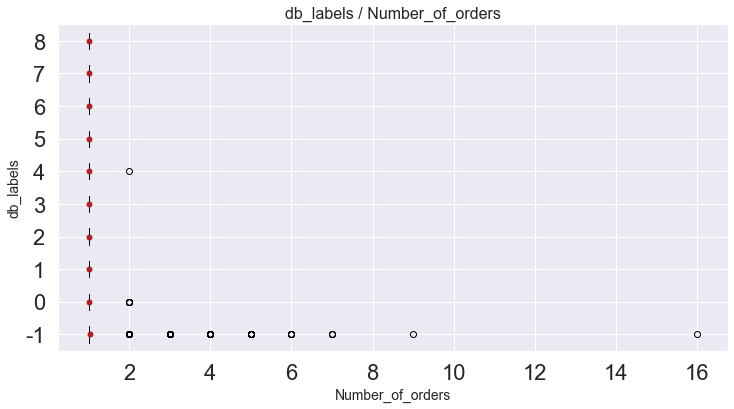

                  sum_sq       df         F    PR(>F)
C(catquali)     1.108963      9.0  2.762414  0.003131
Residual     4055.372566  90917.0       NaN       NaN


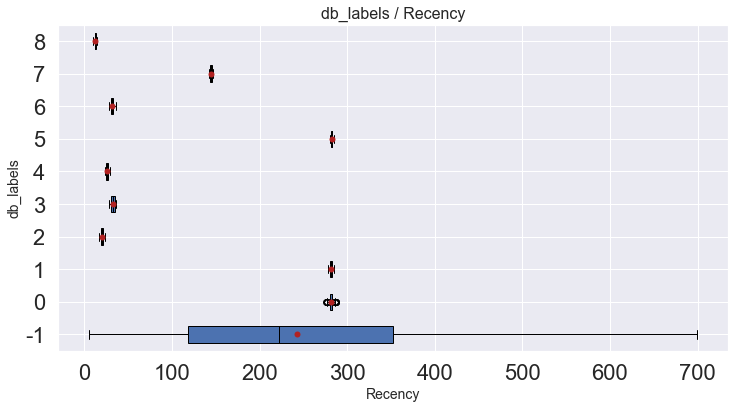

                   sum_sq       df           F         PR(>F)
C(catquali)  2.826617e+07      9.0  136.619493  2.934018e-257
Residual     2.090051e+09  90917.0         NaN            NaN


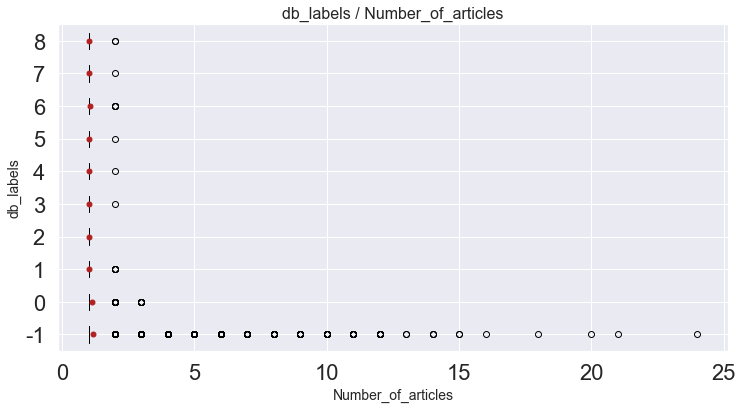

                   sum_sq       df         F        PR(>F)
C(catquali)     23.999222      9.0  6.957855  4.214270e-10
Residual     34843.711117  90917.0       NaN           NaN


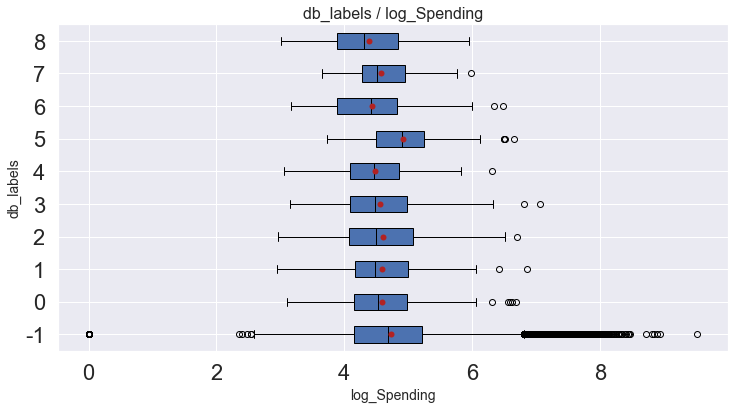

                  sum_sq       df         F        PR(>F)
C(catquali)     45.47318      9.0  7.488472  4.971742e-11
Residual     61342.95871  90917.0       NaN           NaN


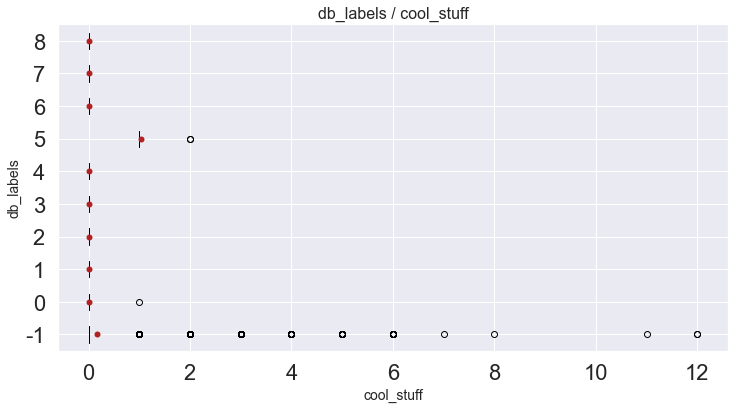

                   sum_sq       df          F         PR(>F)
C(catquali)     91.123896      9.0  59.732789  1.098038e-109
Residual     15410.689778  90917.0        NaN            NaN


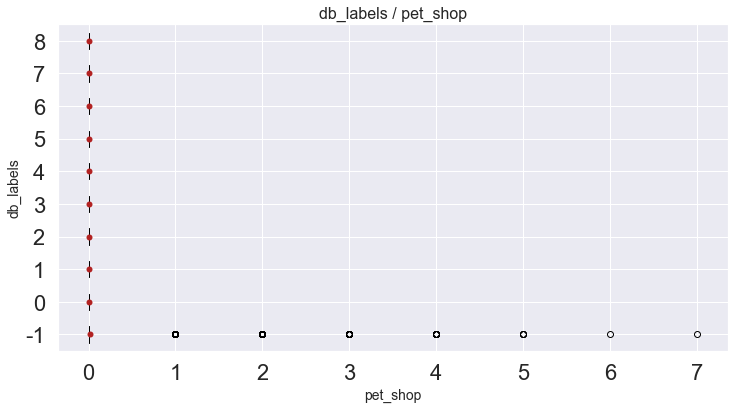

                  sum_sq       df         F    PR(>F)
C(catquali)     0.566549      9.0  2.234592  0.017246
Residual     2561.189651  90917.0       NaN       NaN


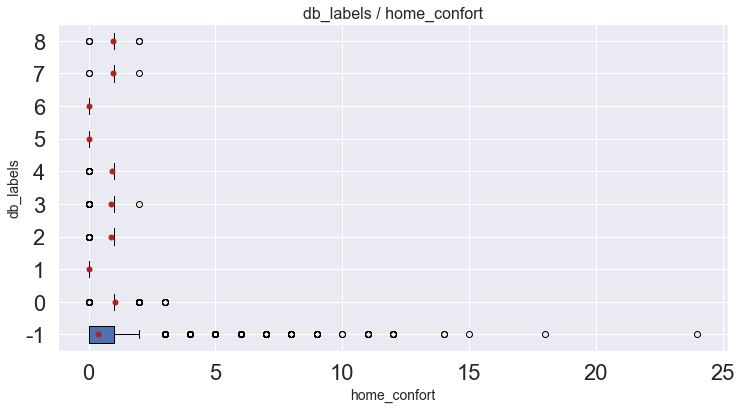

                   sum_sq       df         F         PR(>F)
C(catquali)    420.816223      9.0  94.56249  1.509610e-176
Residual     44954.809653  90917.0       NaN            NaN


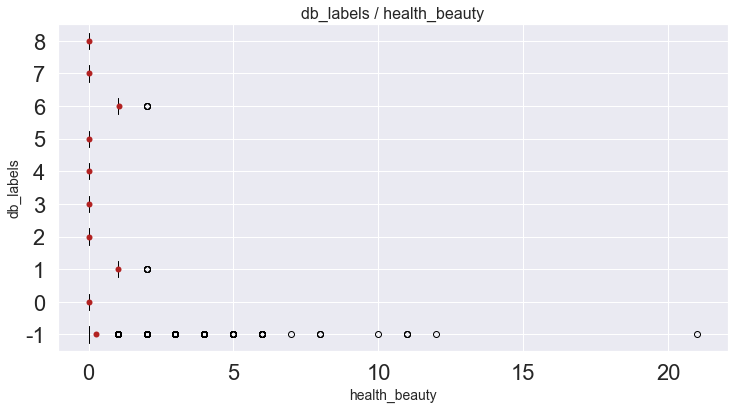

                   sum_sq       df          F         PR(>F)
C(catquali)    220.133714      9.0  88.153851  3.059992e-164
Residual     25225.969049  90917.0        NaN            NaN


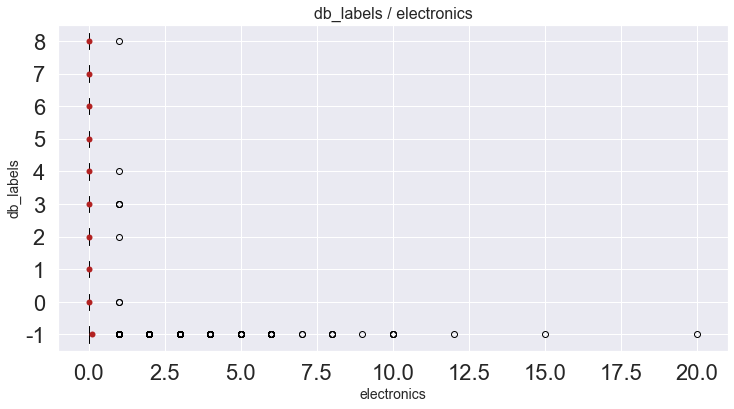

                   sum_sq       df         F        PR(>F)
C(catquali)     16.182270      9.0  10.65112  1.102467e-16
Residual     15347.821096  90917.0       NaN           NaN


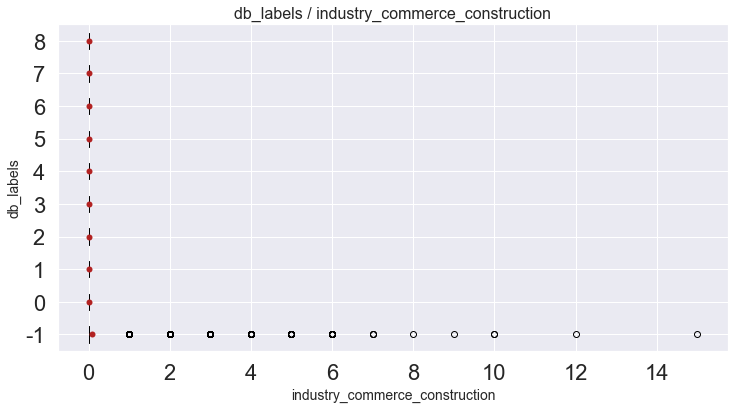

                   sum_sq       df         F        PR(>F)
C(catquali)      8.812234      9.0  7.888519  9.816282e-12
Residual     11284.780516  90917.0       NaN           NaN


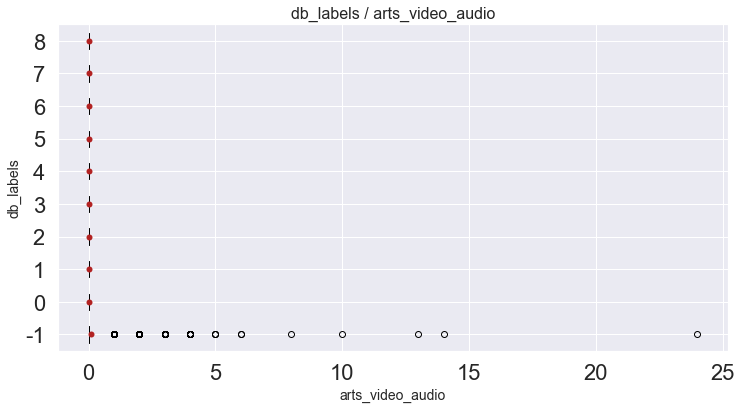

                  sum_sq       df         F        PR(>F)
C(catquali)     7.755389      9.0  8.969966  1.174828e-13
Residual     8734.043109  90917.0       NaN           NaN


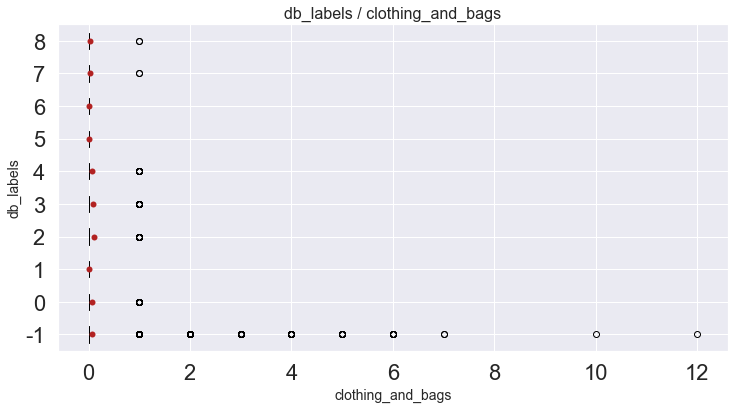

                  sum_sq       df         F    PR(>F)
C(catquali)     2.183520      9.0  2.734031  0.003442
Residual     8067.823211  90917.0       NaN       NaN


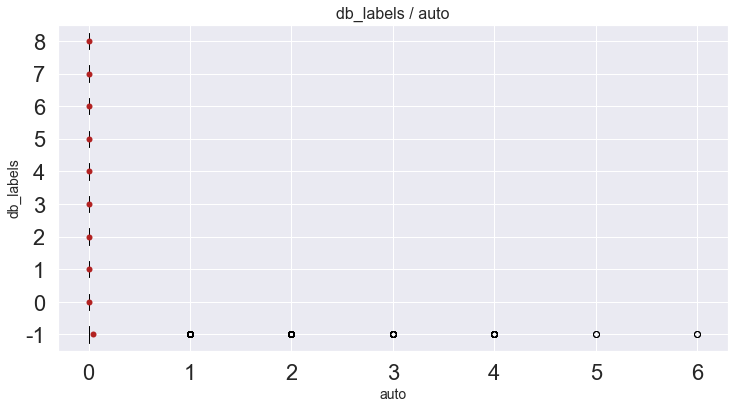

                  sum_sq       df         F        PR(>F)
C(catquali)     2.665050      9.0  5.492353  1.384653e-07
Residual     4901.731818  90917.0       NaN           NaN


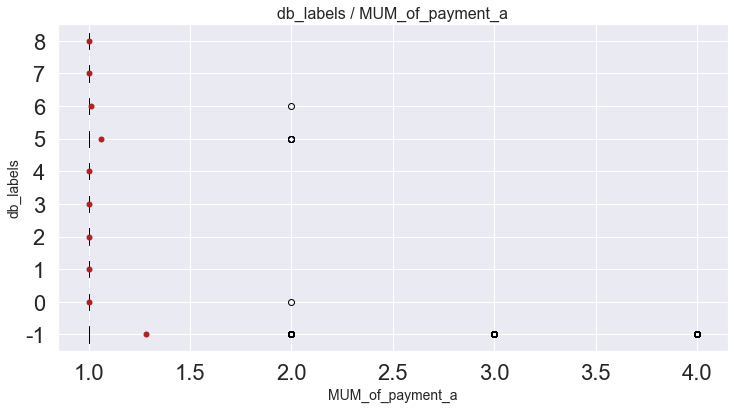

                   sum_sq       df          F        PR(>F)
C(catquali)    100.411354      9.0  33.818472  3.942424e-60
Residual     29993.795999  90917.0        NaN           NaN


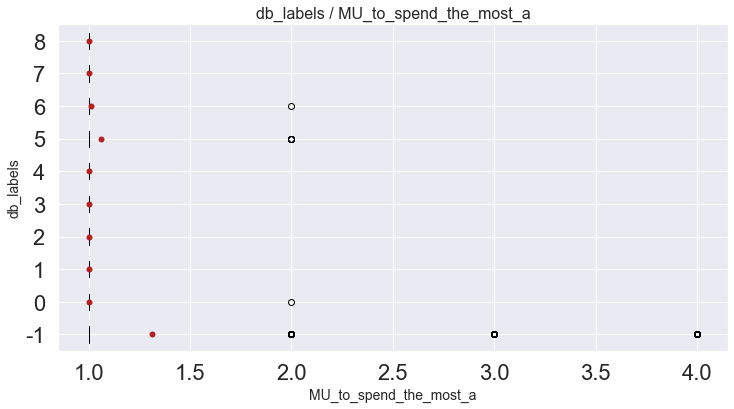

                   sum_sq       df          F        PR(>F)
C(catquali)    119.435277      9.0  36.331905  6.435609e-65
Residual     33208.330557  90917.0        NaN           NaN


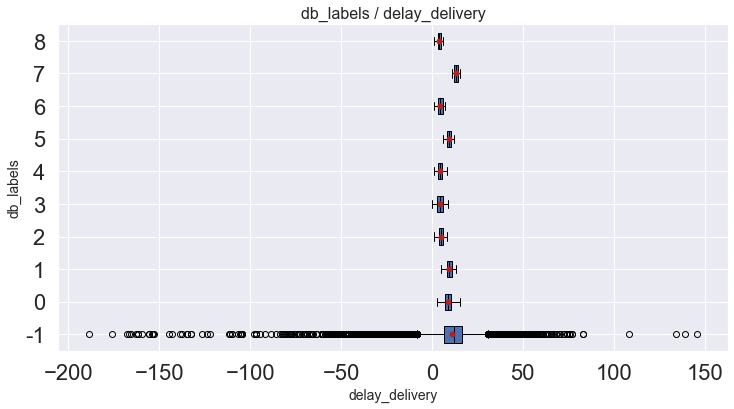

                   sum_sq       df          F        PR(>F)
C(catquali)  2.995023e+04      9.0  32.587689  8.658583e-58
Residual     9.284301e+06  90917.0        NaN           NaN


In [256]:
for i in range(17) :
    boxplots(X_full, 'db_labels', plotcat[i], tukey=0, size=(12,6), showfliers=True, sort = 1, font=12)